<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
<br>


<div class="alert alert-block alert-info">
    <h1> ML Foundation Project (PREDICTING HOUSE PRICES) </h1>
</div>

## Table of Contents

1. [Problem Statement](#section1)
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)<br>
     3.1 [Understanding the Dataset](#section301)<br>
     3.2 [Pre Profiling](#section302)<br>
     3.3 [Preprocessing](#section303)<br>
     3.4 [Post Profiling](#section304)<br>
4. [Visualising the Data](#section4)<br>
     4.1 [Visualising Numeric Variables](#section401)<br>
     4.2 [Correlation between Numerical Columns](#section402)<br>
     4.3 [Visualising Categorical Variables](#section403)<br> 
5. [Data Preparation](#section5)<br>
     5.1 [Label Encoding Categorical Features](#section501)<br>
     5.2 [One Hot Encoding Categorical Features](#section502)<br>
     5.3 [Drop Categorical Features](#section503)<br>
     5.4 [Add new Features](#section504)<br>
6. [Splitting the Data into Training and Testing Sets](#section6)<br>
     6.1 [Rescaling the Features](#section601)<br>
     6.2 [Dividing into X and Y sets for the model building](#section602)<br>  
7. [Build a Linear model](#section7)<br>
     7.1 [Building a linear model with Manual Feature Selection Approach](#section701)<br>
     7.2 [Residual Analysis of the train data](#section702)<br>
     7.3 [Making Predictions Using the Final Model](#section703)<br>
     7.4 [Model Evaluation](#section704)<br>    
8. [Building our model with RFE (Recursive feature elimination)](#section8)<br>  8.1 [Building model using statsmodel, for the detailed statistics](#section801)<br>
     8.2 [Residual Analysis of the train data](#section802)<br>
     8.3 [Making Predictions Using the RFE Model](#section803)<br>
     8.4 [Model Evaluation](#section804)<br>    
9. [RFE Model after Removing Outliers using Automatic Outlier Detection.](#section9)<br>  9.1 [Using IsolationForest](#section901)<br>
     9.2 [Rescaling the Features](#section902)<br>
     9.3 [Dividing into X and Y sets for the model building](#section903)<br>
     9.4 [Building Model with RFE](#section904)<br> 
     9.5 [Building model using statsmodel, for the detailed statistics](#section905)<br>
     9.6 [Residual Analysis of the train data](#section906)<br>
     9.7 [Making Predictions Using the RFE Model](#section907)<br>
     9.8 [Model Evaluation](#section908)<br> 
10. [Final Verdict on the Model](#section10)<br> 
11. [Conclusion](#section11)<br> 

<a id=section1></a>
## 1. Problem Statement

"__Consider that a real estate company has the data of real-estate prices. The company wants to predict and optimize the selling price of the properties, based on important factors such as area, bedrooms, parking, etc.__" <br>

 

* __Essentially, the company wants:__ <br/>

 - To `identify the variables affecting house prices`, e.g., area, number of rooms, bathrooms, etc.
 - To `create a linear model` that `quantitatively` relates house prices with variables, such as the number of rooms, area, number of bathrooms, etc.
 - To know the `accuracy of the model`, i.e. how well do these variables predict the house prices

    
    
The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA) on House Property Data__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

<br>

* __Exploratory Data Analysis__ <br/>
Understand the data related to Property or Houses by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 
    
    
   

<a id=section2></a>
## 2. Data Loading and Description (Housing Data)
<img  src="https://miro.medium.com/max/402/1*2foyXif7hwkO8wWB5T9KtQ.png" >

- The dataset consists of the information about Property Sales and various attributes related to House Properties. Various variables present in the dataset includes area, neighborhood, built year, bedroom, garage information etc. 
- The dataset comprises of  ***1460 observations of 81 columns***. Details of the columns can be found [here](https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/houseprices.txt).

#### Importing packages         

In [1]:
#Importing Packages
import numpy as np                                  # Implements milti-dimensional array and matrices
import pandas as pd                                 # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                     # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                               # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#### Importing the Dataset

In [3]:
housing=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv')

<a id=section3></a>
## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>
### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [4]:
housing.shape                           # This will print the number of rows and columns of the Housing Data Frame

(1460, 81)

Housing Dataset has __1460 rows__ and __81 columns.__

In [5]:
housing.columns                        # This will print the column names in Housing Dataset

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# As we have 81 Columns setting pandas to display all the columns of the DataFrame
pd.pandas.set_option('display.max_columns',None)

In [7]:
housing.head()                        # This will print the first 5 rows of the DataFrame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
housing.tail()                      # This will print the last 5 rows of the DataFrame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
housing.info()                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
#Checking on ID field
print("Unique Id in the dataset: ", len(housing.Id))

Unique Id in the dataset:  1460


Let's create 2 sets of data -- __Qualitative__ and __Quantitative__ features for our future analysis purposes

In [11]:
#Find the number of Numerical and Categorical Columns
num_col=[x for x in housing.columns if housing[x].dtypes != 'O']
print ('Total Number of Numerical Columns: ', len(num_col))
qual_col=[x for x in housing.columns if housing[x].dtypes == 'O']
print ('Total Number of Categorical Columns: ', len(qual_col))

Total Number of Numerical Columns:  38
Total Number of Categorical Columns:  43


In [12]:
#Please note SalePrice is Target Variable and Id is a unique key so it has been omitted in the below list
num_col.remove('Id')
num_col.remove('SalePrice')
print ('Total Number of Numerical Columns after removing Id and SalePrice: ', len(num_col))

Total Number of Numerical Columns after removing Id and SalePrice:  36


Based on the datatype we found __36 quantitative (Excluding Id and SalePrice)__ columns and __43 categorical__ columns

In [13]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [14]:
#Find Attributes with Missing Percentage
missing=housing.isnull().sum()
missing_pct=np.round((housing.isnull().sum()/housing.isnull().count())*100,decimals=2)
print ('List of Attributes and their missing Percentage(%)')
print ('---------------------------------------')
print(missing_pct[missing_pct>0])

List of Attributes and their missing Percentage(%)
---------------------------------------
LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


From the above output we can see that __Alley__, __PoolQC__, __MiscFeature__ have more than __90%__ of null values. We will see how to deal with them. <br/><br/>
Also, notice some related group of attributes  has same missing percentage (%)-
 - MasVnrType and MasVnrArea has same missing percentage
 - BsmtQual, BsmtCond, BsmtFinType1 has same missing percentage
 - BsmtExposure and BsmtFinType2 has same missing percentage
 - GarageType,GarageYrBlt, GarageQual,GarageCond has same missing percentage

<a id=section302></a>
### 3.2 Pre Profiling

In [15]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [16]:
profile = ProfileReport(housing, title='Pandas Profiling Report for Housing Data', html={'style':{'full_width':True}})

In [17]:
profile.to_file(output_file="Housing_Data_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:

 - Number of variables	81
 - Number of observations	1460
 - Missing cells	6965 (5.9%)
 - Duplicate rows	0 (0.0%)


<br>

 - 2ndFlrSF has 829 (56.8%) zeros                          Zeros
 - 3SsnPorch has 1436 (98.4%) zeros	                         Zeros
 - Alley has 1369 (93.8%) missing values	                 Missing

 - BsmtExposure has 38 (2.6%) missing values	Missing
 - BsmtFinType2 has 38 (2.6%) missing values	Missing
 
 - BsmtFinSF1 has 467 (32.0%) zeros	Zeros
 - BsmtFinSF2 has 1293 (88.6%) zeros	Zeros
 
 - BsmtFinType1 has 37 (2.5%) missing values	Missing
 - BsmtCond has 37 (2.5%) missing values	                 Missing
 
 - BsmtQual has 37 (2.5%) missing values	Missing
 - BsmtUnfSF has 118 (8.1%) zeros	Zeros
 - EnclosedPorch has 1252 (85.8%) zeros	Zeros
 - Fence has 1179 (80.8%) missing values	Missing
 - FireplaceQu has 690 (47.3%) missing values	Missing
 
 <br>
 - GarageArea has 81 (5.5%) zeros	Zeros
 - GarageCars has 81 (5.5%) zeros	Zeros
 - GarageCond has 81 (5.5%) missing values	Missing
 - GarageFinish has 81 (5.5%) missing values	Missing
 - GarageQual has 81 (5.5%) missing values	Missing
 - GarageType has 81 (5.5%) missing values	Missing
 - GarageYrBlt has 81 (5.5%) missing values	Missing
 
 
 - LotFrontage has 259 (17.7%) missing values	Missing
 - LowQualFinSF has 1434 (98.2%) zeros	Zeros
 - MasVnrArea has 861 (59.0%) zeros	Zeros
 - MiscFeature has 1406 (96.3%) missing values	Missing
 - MiscVal is highly skewed (γ1 = 24.47679419)	Skewed
 - MiscVal has 1408 (96.4%) zeros	Zeros
 - OpenPorchSF has 656 (44.9%) zeros	Zeros
 - PoolArea has 1453 (99.5%) zeros	Zeros
 - PoolQC has 1453 (99.5%) missing values	Missing
 - ScreenPorch has 1344 (92.1%) zeros	Zeros
 - TotalBsmtSF has 37 (2.5%) zeros	Zeros
 - WoodDeckSF has 761 (52.1%) zeros
 
 <br>


<a id=section303></a>
### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Finding the reason of missing values in Numerical and Categorical Columns
    - Replacing missing entries of data
    - Adding new features to handle the missing data

Text(0.5, 1.0, 'Missing Numerical Attributes')

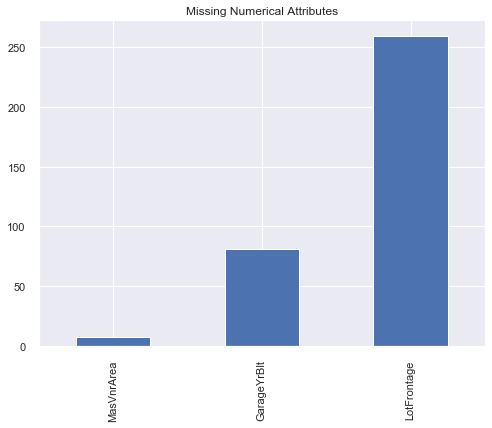

In [18]:
# Find Missing Values in Housing Dataset for Numerical Attributes*/
plt.figure(figsize=(8,6))
missing=housing[num_col].isnull().sum()
missing= missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.title("Missing Numerical Attributes")

__3 Numerical attributes__ have missing values. We can also assume that __most of times NAN means lack of subject__ described by attribute, like no garage hence no Garage Year Built information, but we need to confirm on that.

In [19]:
#Checking Outliers at 25%, 50%, 75%, 90%, 95% and 99%
housing[['LotFrontage','GarageYrBlt','MasVnrArea']].describe(percentiles=[.25,.5,.75,.90,.95,.99])


,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
90%,96.000000,2006.000000,335.000000
95%,107.000000,2007.000000,456.000000
99%,141.000000,2009.000000,791.920000


- From the distribution shown above, you can see there are __some outliers__ in the attributes __LotFrontage__ and __MasVnrArea__ as data has a steep rise from 99 percentile to 100 percentile

Text(0.5, 1.0, 'Bar Plot for MasVnrArea')

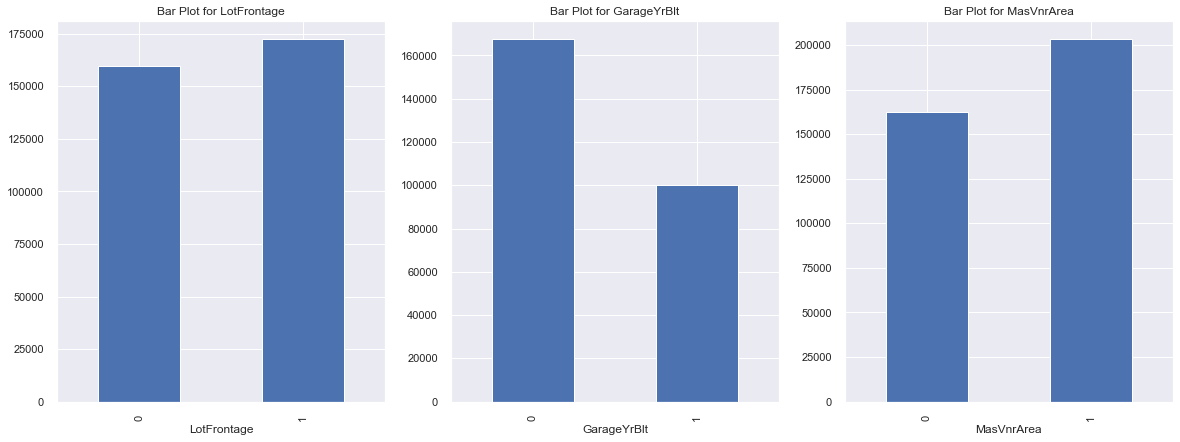

In [20]:
#Let's calculate the mean SalePrice where the information is missing
f,ax = plt.subplots(1,3,figsize=(20,7))
housing_M= housing.copy()

# Converting Missing Values to "1" and Non-Missing Values to "0"
housing_M['LotFrontage']= np.where(housing_M['LotFrontage'].isnull(),1,0)
housing_M['GarageYrBlt']= np.where(housing_M['GarageYrBlt'].isnull(),1,0)
housing_M['MasVnrArea']= np.where(housing_M['MasVnrArea'].isnull(),1,0)

#Plotting bar plots to see the impact of Missing Values on Target Variable (SalePrice)
housing_M.groupby('LotFrontage')['SalePrice'].median().plot.bar(ax=ax[0])
housing_M.groupby('GarageYrBlt')['SalePrice'].median().plot.bar(ax=ax[1])
housing_M.groupby('MasVnrArea')['SalePrice'].median().plot.bar(ax=ax[2])
ax[0].set_title('Bar Plot for LotFrontage')
ax[1].set_title('Bar Plot for GarageYrBlt')
ax[2].set_title('Bar Plot for MasVnrArea')

We clearly see that __Missing Values (referred as "1")__ does have an __impact on Target Variable__ which is __SalePrice__

In [21]:
#Top 5 Features Correlated with LotFrontage
corrmat = housing.corr()
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'LotFrontage')['LotFrontage']
pd.DataFrame({
    
    'correlation with LotFrontage':cols
}).round(decimals=2).sort_values('correlation with LotFrontage',ascending=False).style.bar(color=['grey','lightblue'],align='zero')



,correlation with LotFrontage
LotFrontage,1.000000
1stFlrSF,0.460000
LotArea,0.430000
GrLivArea,0.400000
TotalBsmtSF,0.390000
TotRmsAbvGrd,0.350000


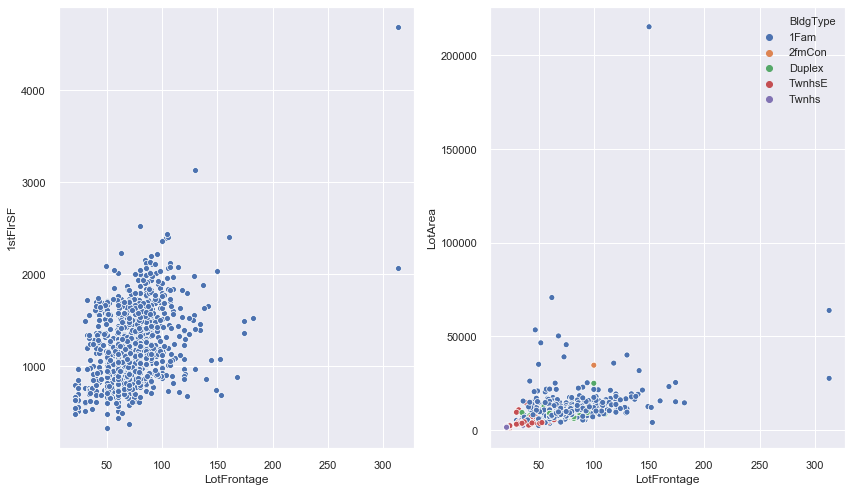

In [22]:
#Checking plots of LotFrontage with the top 2 Correlated Features
f,ax = plt.subplots(1,2,figsize=(12,7))
sns.scatterplot(x=housing['LotFrontage'],y=housing['1stFlrSF'],ax=ax[0])
sns.scatterplot(x=housing['LotFrontage'],y=housing['LotArea'],ax=ax[1],hue=housing['BldgType'])
plt.tight_layout()

We observe tight grouping of very low LotFrontage value with both the correlated attributes <br>
Nothing confirms the reason of null values in LotFrontage, so we will __replace the missing values__ of LotFrontage with __median value__

In [23]:
#Top 5 Features Correlated with GarageYrBlt
corrmat = housing.corr()
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'GarageYrBlt')['GarageYrBlt']
pd.DataFrame({
    
    'correlation with GarageYrBlt':cols
}).round(decimals=2).sort_values('correlation with GarageYrBlt',ascending=False).style.bar(color=['grey','lightblue'],align='zero')


,correlation with GarageYrBlt
GarageYrBlt,1.000000
YearBuilt,0.830000
YearRemodAdd,0.640000
GarageCars,0.590000
GarageArea,0.560000
OverallQual,0.550000


In [24]:
#Finding the Percentage match of garage and houses built in the same year
match_pct_yr=(housing[housing['GarageYrBlt']==housing['YearBuilt']]['GarageYrBlt'].count()/1460)*100
print ('Perentage match between Garage Built Year and House Built Year is :' ,match_pct_yr)

Perentage match between Garage Built Year and House Built Year is : 74.58904109589041


__Garages mostly seem to be built in the same year as houses__

In [25]:
#Check head of data for GarageYearBuilt is null
top_5=housing[housing['GarageYrBlt'].isnull()][['GarageYrBlt','YearBuilt','YearRemodAdd','GarageArea','GarageCars']].head()
print (top_5)
sum_area=housing[housing['GarageYrBlt'].isnull()]['GarageArea'].sum() #Find the sum of area for null values in GarageYrBlt 
print ('The sum of garage area of missing GarageYrBlt is : ',sum_area)

    GarageYrBlt  YearBuilt  YearRemodAdd  GarageArea  GarageCars
39          NaN       1955          1955           0           0
48          NaN       1920          2008           0           0
78          NaN       1968          1968           0           0
88          NaN       1915          1982           0           0
89          NaN       1994          1995           0           0
The sum of garage area of missing GarageYrBlt is :  0


__It confirms our theory that there is no garage built and that is the reason the information is missing.__

In [26]:
print('Sample Records where MasVnrArea is not null')
print ('-----------------------------')
print(housing[~housing['MasVnrArea'].isnull()][['MasVnrArea','MasVnrType']].head())

print ('               ')
print('Sample Records where MasVnrArea is null')
print ('-----------------------------')
print(housing[housing['MasVnrArea'].isnull()][['MasVnrArea','MasVnrType']].head())

Sample Records where MasVnrArea is not null
-----------------------------
   MasVnrArea MasVnrType
0       196.0    BrkFace
1         0.0       None
2       162.0    BrkFace
3         0.0       None
4       350.0    BrkFace
               
Sample Records where MasVnrArea is null
-----------------------------
     MasVnrArea MasVnrType
234         NaN        NaN
529         NaN        NaN
650         NaN        NaN
936         NaN        NaN
973         NaN        NaN


__MasVnrArea__ and __MasVnrType__ has same amount of missing value (0.54%) and based on sample data, it confirms that Masonry veneer is not present at the property and hence the values are null

__We cannot leave Nan (Null) values in numerical columns so we will replace the values with median values__ <br>
__But, after replacing the missing values, we will lose the information on missing values so to handle that we will add new features to capture that information__

In [27]:
housing1=housing.copy()     #Create a copy of original dataFrame
housing1.shape

(1460, 81)

In [28]:
#Creating new features 

housing1['LotFrontage_NAN']= np.where(housing1['LotFrontage'].isnull(),1,0)
housing1['GarageYrBlt_NAN']= np.where(housing1['GarageYrBlt'].isnull(),1,0)
housing1['MasVnrArea_NAN']= np.where(housing1['MasVnrArea'].isnull(),1,0)

In [29]:
housing1.shape #Rechecking shape

(1460, 84)

In [30]:
#Replace missing values with median values

housing1['LotFrontage'].fillna(value=housing1['LotFrontage'].median(),inplace=True) 
housing1['GarageYrBlt'].fillna(value=housing1['GarageYrBlt'].median(),inplace=True) 
housing1['MasVnrArea'].fillna(value=housing1['MasVnrArea'].median(),inplace=True)

In [31]:
#Check the missing values after the fix
housing1[['LotFrontage','GarageYrBlt','MasVnrArea']].isnull().sum() 

LotFrontage    0
GarageYrBlt    0
MasVnrArea     0
dtype: int64

Text(0.5, 1.0, 'Missing Categorical Attributes')

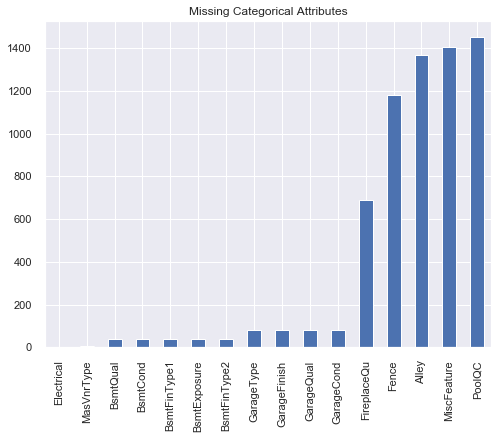

In [32]:
# Find Missing Values in Housing Dataset for Categorical Columns*/
plt.figure(figsize=(8,6))
missing=housing[qual_col].isnull().sum()
missing= missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.title("Missing Categorical Attributes")

16 Categorical attributes have missing values, 5 over 50% of all data. Most of times NAN means lack of subject described by attribute like __missing pool, fence, no garage and basement.__

In order to handle the above we will __replace missing values__ with new __Label__



In [33]:
#Replace missing values with new label "MISSING" 
housing1[qual_col]=housing1[qual_col].fillna('MISSING')

In [34]:
#Check the Missing Values
housing1[list(missing.index)].isnull().sum()

Electrical      0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtFinType1    0
BsmtExposure    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
Alley           0
MiscFeature     0
PoolQC          0
dtype: int64

__Adding new boolean features to handle Zeros/Missing values in the data__

In [35]:
#Creating 12 new features 
housing1['HasBasement'] = housing1['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
housing1['HasGarage'] = housing1['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
housing1['Has2ndFloor'] = housing1['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
housing1['HasMasVnr'] = housing1['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
housing1['HasWoodDeck'] = housing1['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
housing1['HasPorch'] = housing1['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
housing1['Has3SsnPorch'] = housing1['3SsnPorch'].apply(lambda x: 1 if x > 0 else 0)
housing1['HasEnclosedPorch'] = housing1['EnclosedPorch'].apply(lambda x: 1 if x > 0 else 0)
housing1['HasPool'] = housing1['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
housing1['HasFence'] = housing1['Fence'].apply(lambda x: 1 if x in ['MnPrv', 'GdWo', 'GdPrv', 'MnWw'] else 0)
housing1['HasAlley'] = housing1['Alley'].apply(lambda x: 1 if x in ['Grvl', 'Pave'] else 0)
housing1['HasMiscFeature'] = housing1['MiscFeature'].apply(lambda x: 1 if x in ['Shed', 'Gar2', 'Othr', 'TenC'] else 0)
housing1['IsNew'] = housing1['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)

In [36]:
housing1[['IsNew','HasPorch','HasMasVnr','HasWoodDeck','HasGarage','Has2ndFloor','HasBasement','HasPool',
          'Has3SsnPorch','HasMiscFeature','HasFence','HasAlley','HasEnclosedPorch']].head()

,IsNew,HasPorch,HasMasVnr,HasWoodDeck,HasGarage,Has2ndFloor,HasBasement,HasPool,Has3SsnPorch,HasMiscFeature,HasFence,HasAlley,HasEnclosedPorch
0,1,1,1,0,1,1,1,0,0,0,0,0,0
1,0,0,0,1,1,0,1,0,0,0,0,0,0
2,1,1,1,0,1,1,1,0,0,0,0,0,0
3,0,1,0,0,1,1,1,0,0,0,0,0,1
4,0,1,1,1,1,1,1,0,0,0,0,0,0


__Dropping Features__

In [37]:
housing1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [38]:
#Dropping Id from the DataFrame as it is unique key and does not add any value for our analysis
housing1.drop(['Id'],inplace=True,axis=1)

In [39]:
#check housing1 shape after adding features
housing1.shape

(1460, 96)

<a id=section304></a>
### 3.4 Post Pandas Profiling

In [40]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [41]:
profile = ProfileReport(housing1, title='Pandas Profiling Report for Housing Data', html={'style':{'full_width':True}})


In [42]:
profile.to_file(output_file="Housing_Data_after_preprocessing.html")

- Number of variables	96
- Number of observations	1460
- Missing cells	0 (0.0%)
- Duplicate rows	0 (0.0%)


- Has2ndFloor is highly correlated with 2ndFlrSF	High Correlation
- 2ndFlrSF is highly correlated with Has2ndFloor	High Correlation
- HasGarage is highly correlated with GarageYrBlt_NAN	High Correlation
- GarageYrBlt_NAN is highly correlated with HasGarage	High Correlation
- PoolArea is highly correlated with HasPool	High Correlation
- HasPool is highly correlated with PoolArea


<a id=section4></a>
## 4.0 Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here we will also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

Text(0.5, 1.0, 'Distribution of SalePrice (Target Variable)')

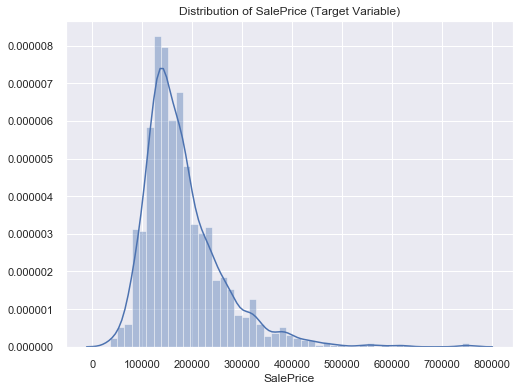

In [43]:
#Check the Distribution of Target Variable
plt.figure(figsize=(8,6))
sns.distplot(housing['SalePrice'])
plt.title('Distribution of SalePrice (Target Variable)')

The distribution of Sales Price is slightly __right skewed__ but still good enough to proceed for __Multiple Linear Regression__
<br>
Please note that training a linear regression model does not require that the explanatory or target variables are normally distributed. The normality assumption is only a requirement for certain statistical tests and hypothesis tests.

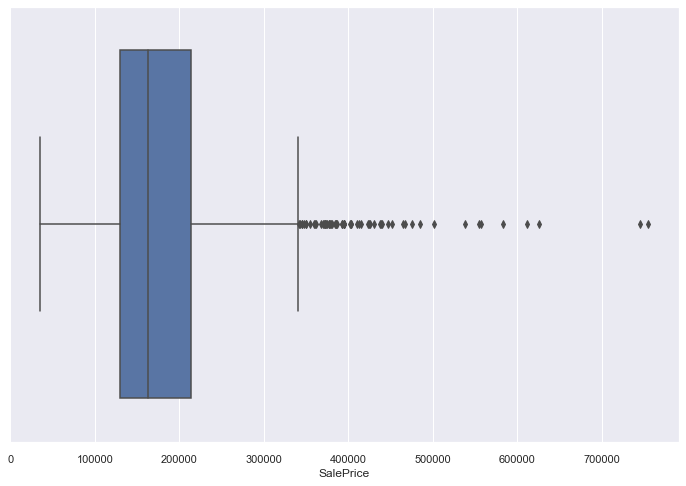

In [44]:
#Check for Outliers
plt.figure(figsize=(12,8))
sns.boxplot(housing1['SalePrice'])

- It seems there are __outliers__ as we can see properties with very high SalePrice range.
<br>
- We will learn to deal with this later.

<a id=section401></a>
### 4.1 Visualising Numeric Variables

Let's compare Numerical Variables with SalePrice

In [45]:
#Find Discrete Features
discrete_feature= [x for x in num_col if len(housing1[x].unique())<25]
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [46]:
#Find Continuous Features
continuous_feature= [x for x in num_col if x not in discrete_feature]
continuous_feature

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

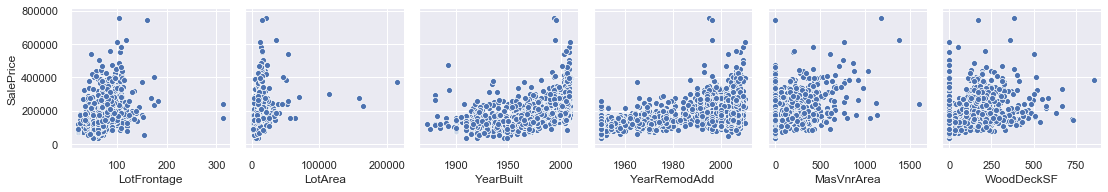

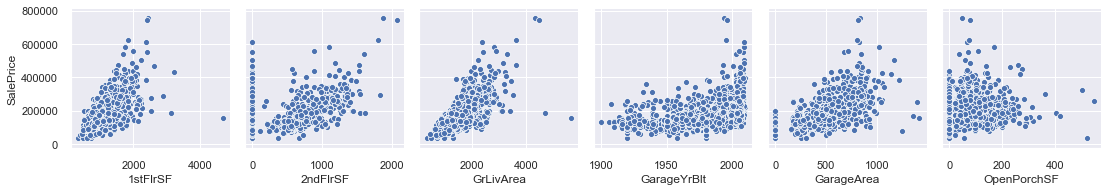

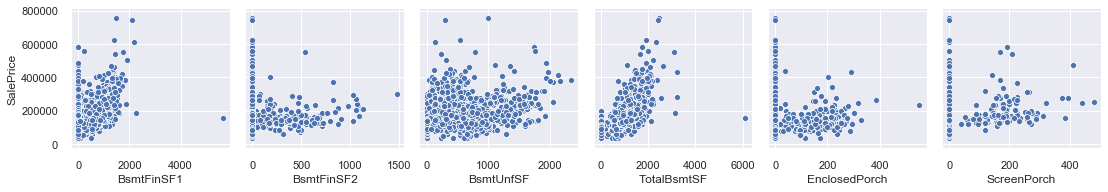

In [47]:
#Comparing Continuous Numerical Features with SalePrice

cols=['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','WoodDeckSF']
cols1=['1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea','OpenPorchSF']
cols2=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','EnclosedPorch','ScreenPorch']


sns.pairplot(housing1,x_vars=cols,y_vars=['SalePrice'])
sns.pairplot(housing1,x_vars=cols1,y_vars=['SalePrice'])
sns.pairplot(housing1,x_vars=cols2,y_vars=['SalePrice'])
plt.show()

- __GrLivArea, 1stFlrSF, TotalBsmtSF__ show __positive Correlation__ with SalePrice

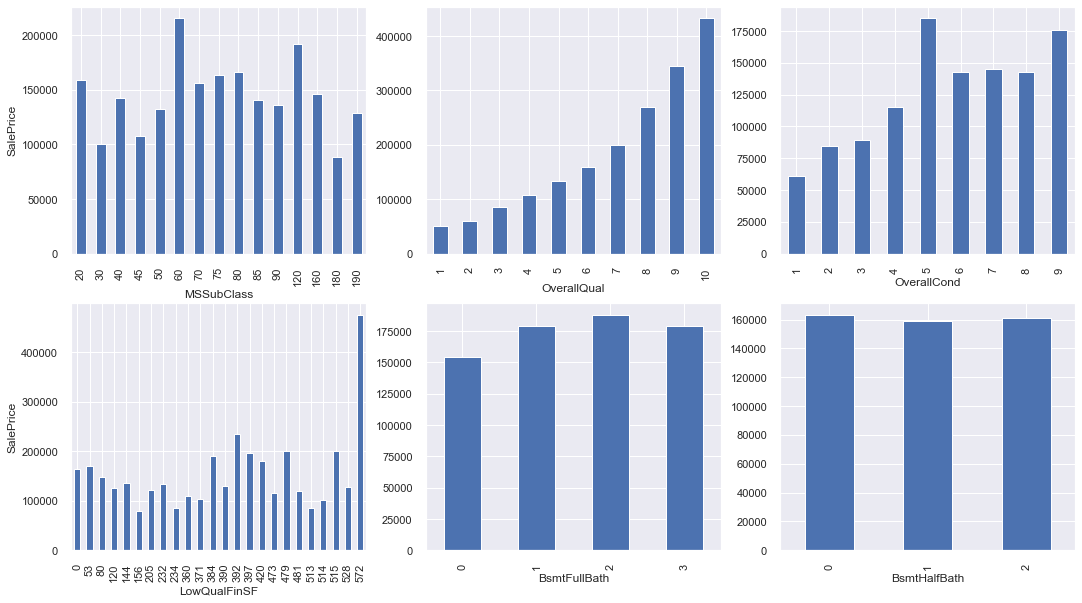

In [48]:
#Comparing Discrete Numerical columns with SalePrice
#Plotting BarGraph for first six Discrete Features
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
housing1.groupby('MSSubClass')['SalePrice'].median().plot.bar()
plt.ylabel('SalePrice')
plt.subplot(2,3,2)
housing1.groupby('OverallQual')['SalePrice'].median().plot.bar()
plt.subplot(2,3,3)
housing1.groupby('OverallCond')['SalePrice'].median().plot.bar()
plt.subplot(2,3,4)
housing1.groupby('LowQualFinSF')['SalePrice'].median().plot.bar()
plt.ylabel('SalePrice')
plt.subplot(2,3,5)
housing1.groupby('BsmtFullBath')['SalePrice'].median().plot.bar()
plt.subplot(2,3,6)
housing1.groupby('BsmtHalfBath')['SalePrice'].median().plot.bar()
plt.show()

- __OverallQual__ has an exponential growth of SalePrice

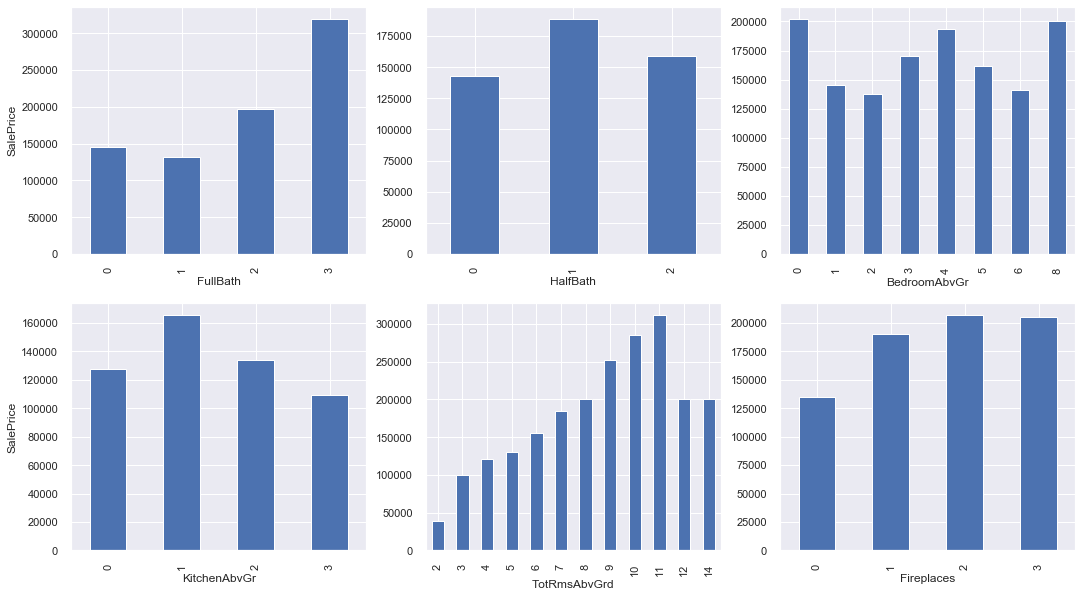

In [49]:
#Plotting BarGraph for next six Discrete Features
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
housing1.groupby('FullBath')['SalePrice'].median().plot.bar()
plt.ylabel('SalePrice')
plt.subplot(2,3,2)
housing1.groupby('HalfBath')['SalePrice'].median().plot.bar()
plt.subplot(2,3,3)
housing1.groupby('BedroomAbvGr')['SalePrice'].median().plot.bar()
plt.subplot(2,3,4)
housing1.groupby('KitchenAbvGr')['SalePrice'].median().plot.bar()
plt.ylabel('SalePrice')
plt.subplot(2,3,5)
housing1.groupby('TotRmsAbvGrd')['SalePrice'].median().plot.bar()
plt.subplot(2,3,6)
housing1.groupby('Fireplaces')['SalePrice'].median().plot.bar()
plt.show()

- __TotRmsAbvGrd , FullBath__ shows an exponential growth

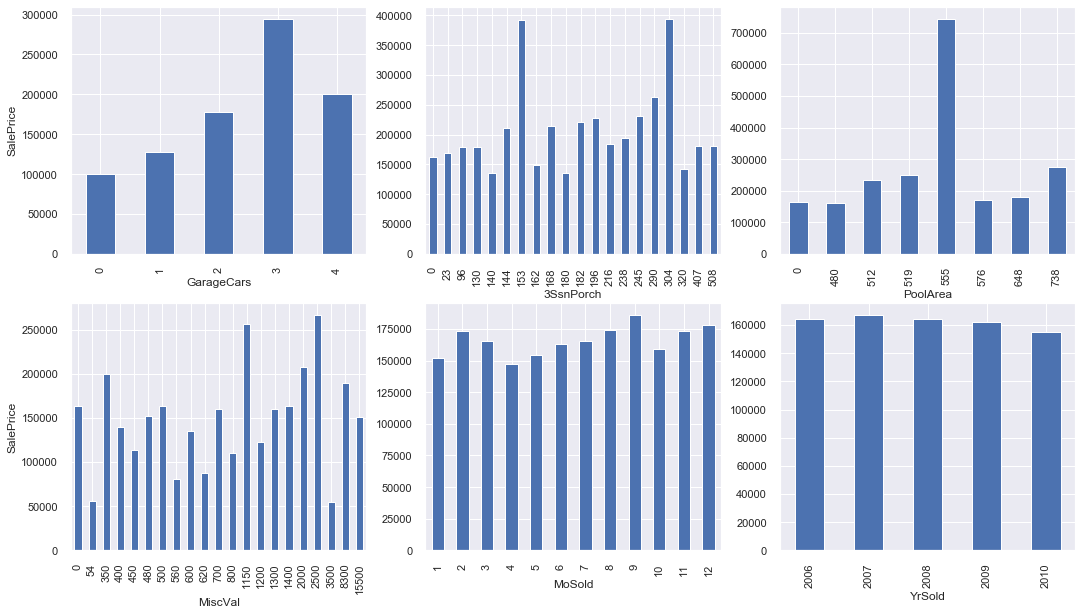

In [50]:
#Plotting BarGraph for last six Discrete Features
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
housing1.groupby('GarageCars')['SalePrice'].median().plot.bar()
plt.ylabel('SalePrice')
plt.subplot(2,3,2)
housing1.groupby('3SsnPorch')['SalePrice'].median().plot.bar()
plt.subplot(2,3,3)
housing1.groupby('PoolArea')['SalePrice'].median().plot.bar()
plt.subplot(2,3,4)
housing1.groupby('MiscVal')['SalePrice'].median().plot.bar()
plt.ylabel('SalePrice')
plt.subplot(2,3,5)
housing1.groupby('MoSold')['SalePrice'].median().plot.bar()
plt.subplot(2,3,6)
housing1.groupby('YrSold')['SalePrice'].median().plot.bar()
plt.show()

- We also see a __slight decline__ in __SalePrice with YrSold__ which usually dont happen (We will do more analysis on this later)

Comparing all the __numerical predictor variables__ with __Target Variable (SalePrice)__, there are some  nonlinearities in attributes like __OverallQual, TotRmsAbvGrd , FullBath__  but we can also see dependent variables like __GrLivArea, 1stFlrSF, YearBuilt, 2ndFlrSF, GarageArea__ etc. __showing some Linear Relationship__ with the independent variable which makes Linear Regression Model one of the candidates to solve the given Problem Statement.

The above graph gives a fair bit of idea but now lets check the correlation value of __Independent variables__ with __SalePrice__

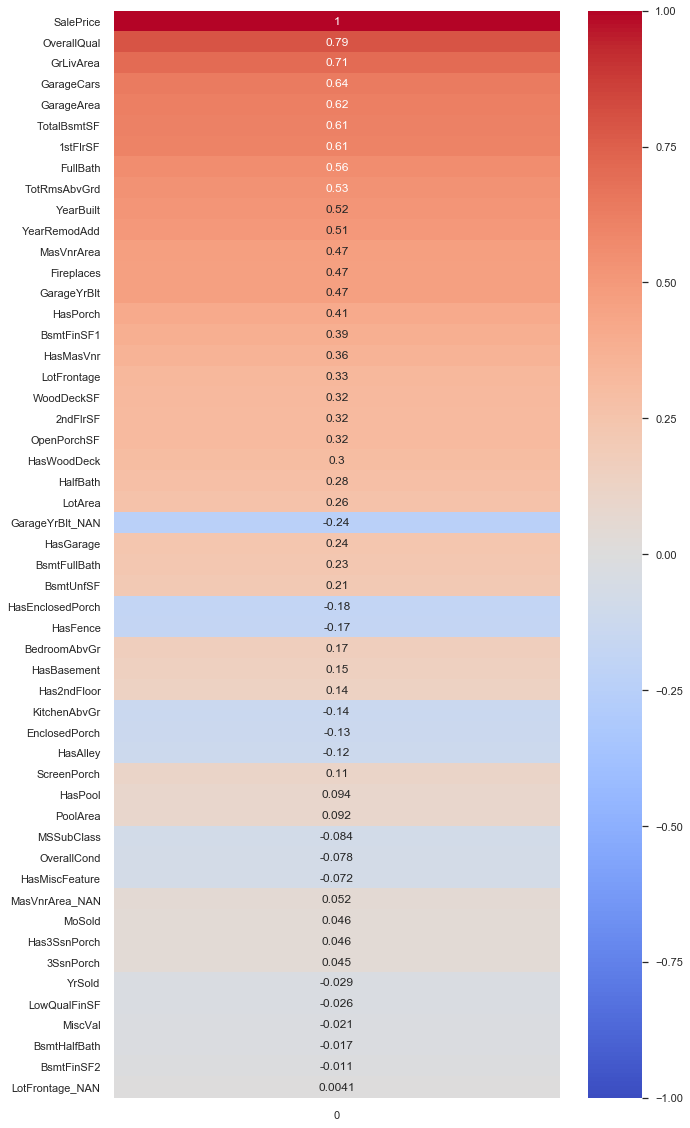

In [51]:
#Checking Correlation of SalePrice with other numerical attributes
correlations = housing1.corrwith(housing1['SalePrice']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

### 4.2 Correlation between Numerical Attributes

Making a pairplot of all the numeric variables would be too messy so lets create a heatmap to check the correlation between the independent variables

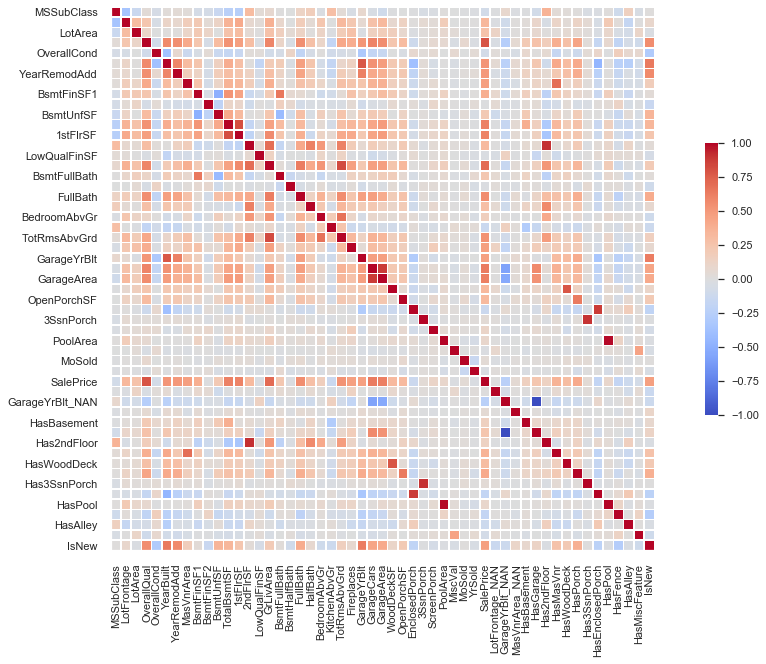

In [53]:
#Correlation between numerical attributes 
plt.figure(figsize=(20,10))
corr = housing1.corr()
g = sns.heatmap(corr,  vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(18,10)
    
plt.show()

There are lot of __multicollinearity__ in our dataset which needs to be handled. Some examples below: <br>

There are lot of __strong positive correlation__ between numerical attributes <br>
 - GarageYrBlt: (Year garage was built) is __highly correlated__ with <br>
     - GarageCars: Size of garage in car capacity
     - GarageArea: Size of garage in square feet
     - OverallQual: Overall material and finish quality
     - YearBuilt: Original construction date
     - And More..
     
     <br/>
     
 - TotalBsmtSF: (Total square feet of basement area) is __highly correlated__ with <br>
     - 1stFlrSF: First Floor square feet
     - LotFrontage: Linear feet of street connected to property
     - LotArea: Lot size in square feet
     - OverallQual: Overall material and finish quality
     - YearBuilt: Original construction date
     - YearRemodAdd: Remodel date
     - MasVnrArea: Masonry veneer area in square feet
     - BsmtFinSF1: Type 1 finished square feet
     - And More..
 

__High negative correlation__ between <br>
 - BsmtFinSF1: (Type 1 finished square feet) -- BsmtUnfSF: (Unfinished square feet of basement area) <br>
 - BsmtFullBath: (Basement full bathrooms) -- BsmtUnfSF: (Unfinished square feet of basement area) <br>
 - EnclosedPorch: (Enclosed porch area in square feet) -- YearBuilt: (Original construction date)
 


In [54]:
#Top 20 Features Correlated with SalesPrice
corrmat = housing1.corr()
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'GarageYrBlt', 'IsNew',
       'HasPorch', 'BsmtFinSF1', 'HasMasVnr', 'LotFrontage', 'WoodDeckSF'],
      dtype='object')

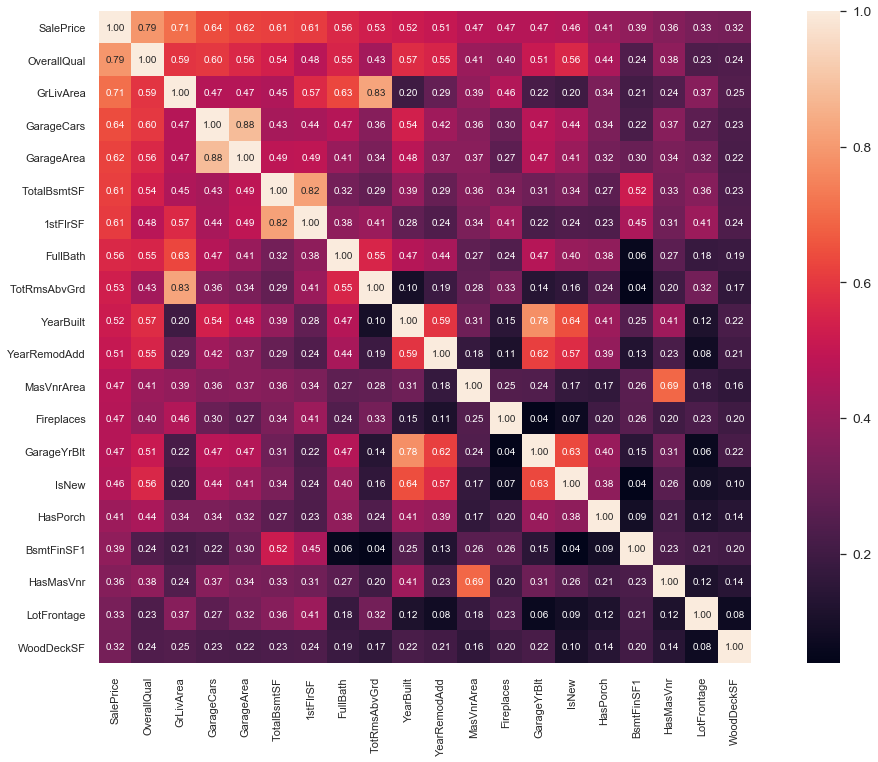

In [55]:
#Checking the Correlation for the top 20 Features using Heatmap
cm =np.corrcoef(housing1[cols].values.T)
plt.subplots(figsize=(20,12))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

__Garages seem to be built same year as houses whereas basements have generally same area as first floor which is pretty obvious.<br> 
Garage area is strongly correlated with number of cars. <br>
Total Rooms above ground is also highly correlated with Above grade (ground) living area square feet.__

__Bathrooms Features__

It's time to take a break and go to the toilet, to our luck there are 4 bathroom variables in our data set

<img src="https://cdn.home-designing.com/wp-content/uploads/2019/11/red-bathroom-vanity.jpg" style="width: 450px; height: 500.461px; margin: 5px;">

Text(0.5, 1.0, 'Correlation with SalePrice: -0.0168')

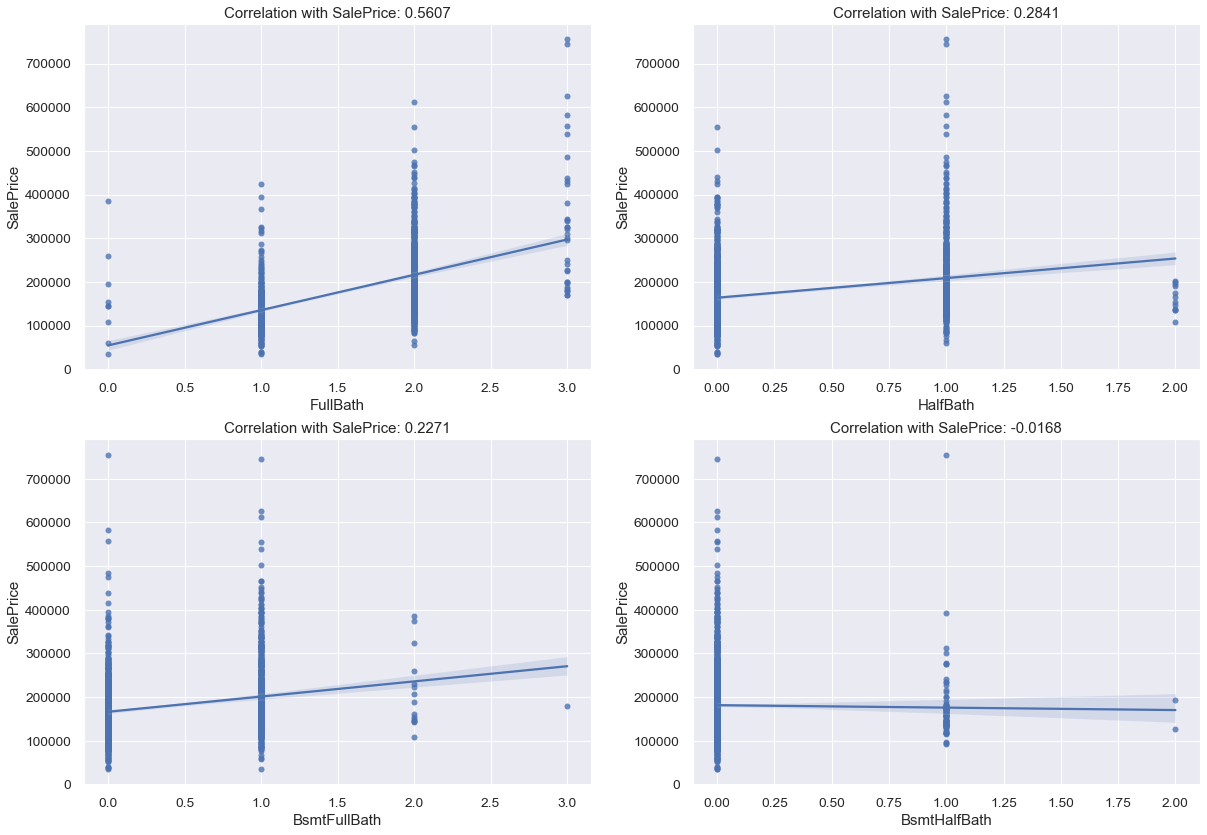

In [60]:
#Plotting BarGraph for last 4 Bathroom Features
plt.figure(figsize=(20, 14))
plt.subplot(2,2,1)
sns.regplot(x='FullBath',y='SalePrice',data=housing1)
plt.ylabel('SalePrice')
plt.title('Correlation with SalePrice: {:6.4f}'.format(housing1.FullBath.corr(housing1['SalePrice'])))
plt.subplot(2,2,2)
sns.regplot(x='HalfBath',y='SalePrice',data=housing1)
plt.title('Correlation with SalePrice: {:6.4f}'.format(housing1.HalfBath.corr(housing1['SalePrice'])))
plt.subplot(2,2,3)
sns.regplot(x='BsmtFullBath',y='SalePrice',data=housing1)
plt.title('Correlation with SalePrice: {:6.4f}'.format(housing1.BsmtFullBath.corr(housing1['SalePrice'])))
plt.subplot(2,2,4)
sns.regplot(x='BsmtHalfBath',y='SalePrice',data=housing1)
plt.ylabel('SalePrice')
plt.title('Correlation with SalePrice: {:6.4f}'.format(housing1.BsmtHalfBath.corr(housing1['SalePrice'])))

- FullBath has the largest correlation with SalePrice. The others individually, these features may not be very important.

 Adding them up into one predictor, this predictor is likely to become a strong one

In [61]:
#Creating Bathroom DataFrame to analyse on bathroom Features
df_bathroom = housing1[['SalePrice', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']]
df_bathroom ['TotBathrooms'] = df_bathroom.FullBath + (df_bathroom.HalfBath*0.5) + df_bathroom.BsmtFullBath + (df_bathroom.BsmtHalfBath*0.5)


Text(0.5, 1, 'Heatmap for Bathroom Features')

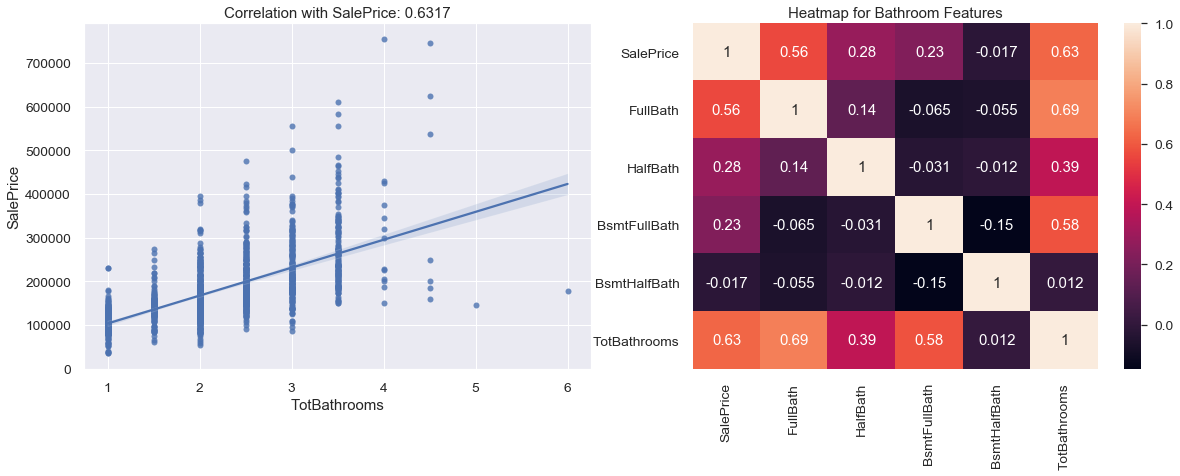

In [62]:
#Plotting Regplot of Total bathroom with SalePrice
plt.figure(figsize=(20, 14))
plt.subplot(2,2,1)
sns.regplot(x='TotBathrooms',y='SalePrice',data=df_bathroom)
plt.ylabel('SalePrice')
plt.title('Correlation with SalePrice: {:6.4f}'.format(df_bathroom.TotBathrooms.corr(housing1['SalePrice'])))

plt.subplot(2,2,2)
sns.heatmap(df_bathroom.corr(),annot=True)
plt.title('Heatmap for Bathroom Features')


- Total Bathrooms have a better correlation than other bathroom features to SalePrice

__Lets look at the relationship between Year of Property Sold with the median of SalePrice__

Text(0.5, 1.0, 'House price vs Year Sold')

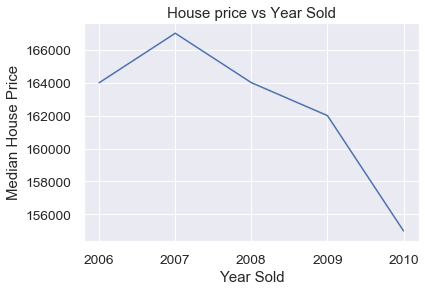

In [63]:
housing1.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title ('House price vs Year Sold')

- As the year increases, the __expectation__ is that __SalePrice should increase__ but here __its decreasing which is weird.__

__Year Features__

Year_Built vs Garage_Year_Built vs Year_Remodeled

<img class="n3VNCb" src="https://headfonia.com/wp-content/uploads/2015/12/Happy-New-Year-2015-2016-2017.jpg" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd;" style="width: 450px; height: 318.261px; margin: 0px;">

In [64]:
#Find all features with Year
Yr_Feature=[x for x in housing.columns if 'Yr' in x or 'Year' in x ]
Yr_Feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

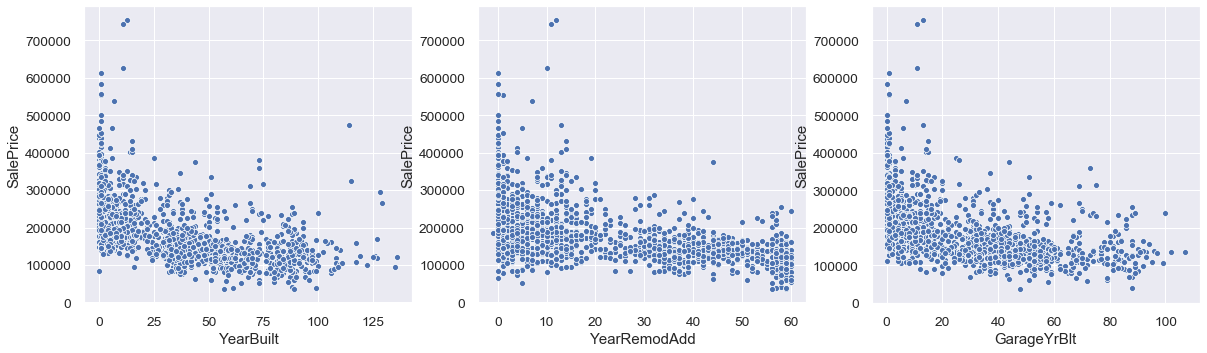

In [65]:
#Plotting scatterplot between other Year Features with Saleprice
data=housing.copy()

#Calculating Other Year Features as Number of Years from the "YrSold"
data['YearBuilt']=data['YrSold'] - data['YearBuilt']
data['YearRemodAdd']=data['YrSold'] - data['YearRemodAdd']
data['GarageYrBlt']=data['YrSold'] - data['GarageYrBlt']
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.scatterplot(x = 'YearBuilt', y = 'SalePrice', data = data)
plt.subplot(2,3,2)
sns.scatterplot(x = 'YearRemodAdd', y = 'SalePrice', data = data)
plt.subplot(2,3,3)
sns.scatterplot(x = 'GarageYrBlt', y = 'SalePrice', data = data)

- __This shows the less age of the house, the higher the SalePrice of the Property__

In [66]:
#Create new Feature "HasRemod" to add value (1/0)
data['HasRemod'] = 2
data.loc[(data.YearBuilt==data.YearRemodAdd), ['HasRemod']] = 0  #No Remodeling
data.loc[(data.YearBuilt!=data.YearRemodAdd), ['HasRemod']] = 1  #Remodeled
data['HasRemod'].value_counts()


0    764
1    696
Name: HasRemod, dtype: int64

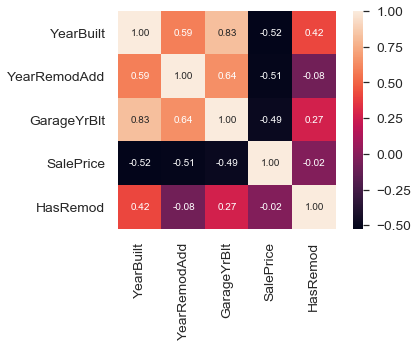

In [67]:
#Plotting heatmap between various updated year  features with SalePrice
sns.heatmap(data[['YearBuilt','YearRemodAdd','GarageYrBlt','SalePrice','HasRemod']].corr(),cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
            )

- __YearBuilt__ has high correlation with __YearRemodAdd and GarageYrBlt__
- __HasRemod__ is added as a Categorical Feature and does not have high correlation with any of the other Year Features

__Garage Features__

Its time to park the analysis to Garage Features

<img class="n3VNCb" src="https://www.familyhandyman.com/wp-content/uploads/2020/02/GettyImages-1191772225-1024x1024.jpg" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd;" style="width: 450px; height: 450px; margin: 0px;">

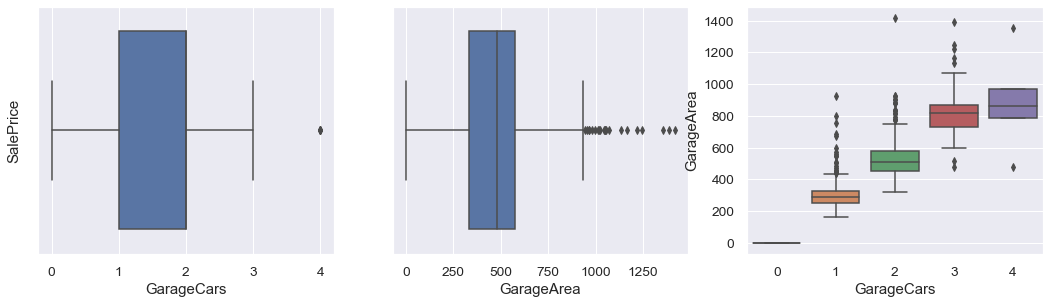

In [69]:
#Plotting graphs for Garage Features
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
sns.boxplot(x='GarageCars',data=housing1)
plt.ylabel('SalePrice')
plt.subplot(2,3,2)
sns.boxplot(x='GarageArea',data=housing1)
plt.subplot(2,3,3)
sns.boxplot(x='GarageCars',y='GarageArea',data=housing1)

- Garage Cars is highly correlated with Garage Area which makes sense

__Based on the EDA and correlation (>0.25) with SalePrice, 13 numerical independent features were selected.__ <br>

_Also, 21 Numerical columns were rejected for future analysis and model building because of :_ <br>
    - Multicollinearity (High Correlation with other existing Independent Feature)
    - Weak Correlation (< 0.25) with SalePrice
    - Feature Engineering (New Feature added with combination other independent features)

| Numerical Features   | Selection/Rejection                                               |
| ------------- |:-------------                                            :| 
| OverallQual          | Selected                                        | 
| GrLivArea         | Selected                         |  
| GarageCars           | Selected                                           | 
| TotalBsmtSF      | Selected                                        |   
| 1stFlrSF| Rejected (correlated with TotalBsmtSF)                                          |
| GarageArea     | Rejected (correlated with GarageCars)|
| FullBath      | Rejected (Added new Feature TotBathrooms) |
| TotRmsAbvGrd         | Rejected (correlated with GrLivArea)|
| YearBuilt        | Selected             |
| YearRemodAdd          | Rejected (correlated with YearBuilt)             |
| MasVnrArea         | Selected                                              |
| Fireplaces        | Selected                                         |
| GarageYrBlt         | Rejected (correlated with YearBuilt)                          |
| BsmtFinSF1           | Selected                     |
| LotFrontage       | Selected                   |
| 2ndFlrSF       | Selected                       |
| OpenPorchSF           | Selected               |
| WoodDeckSF         | Selected            |
| HalfBath      | Rejected (Added new Feature TotBathrooms)   |
| LotArea       | Selected |
|BsmtFullBath   | Rejected (Added new Feature TotBathrooms)  |
|BsmtUnfSF      | Rejected (Weak Correlation) |
|BedroomAbvGr   | Rejected (Weak Correlation) |
|ScreenPorch    | Rejected (Weak Correlation) |
|PoolArea       | Rejected (Weak Correlation) |
|MoSold         | Rejected (Weak Correlation) |
|3SsnPorch      | Rejected (Weak Correlation) |
|BsmtFinSF2     | Rejected (Weak Correlation) |
|BsmtHalfBath   | Rejected (Added new Feature TotBathrooms)  |
|MiscVal        | Rejected (Weak Correlation) |
|LowQualFinSF   | Rejected (Weak Correlation) |
|YrSold         | Rejected (Weak Correlation) |
|OverallCond    | Rejected (Weak Correlation) |
|MSSubClass     | Rejected (Weak Correlation) |
|EnclosedPorch  | Rejected (Weak Correlation) |
|KitchenAbvGr   | Rejected (Weak Correlation) |

__Among the new features added, below are the list of selected and rejected features__ <br/>

Please note that we are also selecting features with weak correlation to SalePrice and will be dropped later if it does not add value to model

| New Features   | Selection/Rejection                                               |
| ------------- |:-------------                                            :| 
| TotBathrooms         | Selected |
| IsNew          | Selected                                        | 
| HasPorch         | Selected                         |  
| HasMasVnr           | Selected                                           | 
| HasWoodDeck      | Selected                                        |   
| HasGarage| Selected                                           |
| HasBasement     | Selected|
| Has2ndFloor      | Rejected (correlated with 2ndFlrSF) |
| HasPool         | Selected |
| MasVnrArea_NAN        | Selected             |
| Has3SsnPorch          | Selected             |
| LotFrontage_NAN         | Selected                                              |
| HasMiscFeature        | Selected                                         |
| HasFence         | Selected                          |
| HasAlley         | Selected |
| HasEnclosedPorch           | Selected                     |
| GarageYrBlt_NAN       | Rejected (correlated with HasGarage)                 |
| HasRemod            | Selected |

__Check any outliers in the above selected Numerical features__

In [70]:
#List out all Selected and Rejected features
selected_num_cols=['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','YearBuilt','MasVnrArea',
         'Fireplaces','BsmtFinSF1','LotFrontage','2ndFlrSF','OpenPorchSF','WoodDeckSF','LotArea']

selected_new_features=['TotBathrooms','IsNew','HasPorch','HasMasVnr','HasWoodDeck','HasGarage','HasBasement','HasPool',
                        'MasVnrArea_NAN','Has3SsnPorch','LotFrontage_NAN','HasMiscFeature','HasFence','HasAlley',
                       'HasEnclosedPorch','HasRemod']

rejected_num_cols=['1stFlrSF','GarageArea','FullBath','TotRmsAbvGrd','YearRemodAdd','GarageYrBlt','BsmtFullBath','BsmtUnfSF',
                    'BedroomAbvGr','ScreenPorch','PoolArea','MoSold','3SsnPorch','BsmtFinSF2','BsmtHalfBath',
                    'MiscVal','LowQualFinSF','YrSold','OverallCond','EnclosedPorch','KitchenAbvGr','HalfBath']

rejected_new_features=['Has2ndFloor','GarageYrBlt_NAN']

In [71]:
#Checking Outliers at 25%, 50%, 75%, 90%, 95% and 99%
housing[selected_num_cols].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,2ndFlrSF,OpenPorchSF,WoodDeckSF,LotArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,1057.429452,1971.267808,103.685262,0.613014,443.639726,70.049958,346.992466,46.660274,94.244521,10516.828082
std,1.382997,525.480383,0.747315,438.705324,30.202904,181.066207,0.644666,456.098091,24.284752,436.528436,66.256028,125.338794,9981.264932
min,1.000000,334.000000,0.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,1300.000000
25%,5.000000,1129.500000,1.000000,795.750000,1954.000000,0.000000,0.000000,0.000000,59.000000,0.000000,0.000000,0.000000,7553.500000
50%,6.000000,1464.000000,2.000000,991.500000,1973.000000,0.000000,1.000000,383.500000,69.000000,0.000000,25.000000,0.000000,9478.500000
75%,7.000000,1776.750000,2.000000,1298.250000,2000.000000,166.000000,1.000000,712.250000,80.000000,728.000000,68.000000,168.000000,11601.500000
90%,8.000000,2158.300000,3.000000,1602.200000,2006.000000,335.000000,1.000000,1065.500000,96.000000,954.200000,130.000000,262.000000,14381.700000
95%,8.000000,2466.100000,3.000000,1753.000000,2007.000000,456.000000,2.000000,1274.000000,107.000000,1141.050000,175.050000,335.000000,17401.150000
99%,10.000000,3123.480000,3.000000,2155.050000,2009.000000,791.920000,2.000000,1572.410000,141.000000,1418.920000,285.820000,505.460000,37567.640000


__Checking data spread, we can definitely see some outliers in the numerical features like TotalBsmtSF, LotFrontage,
2ndFlrSF, LotArea etc.__

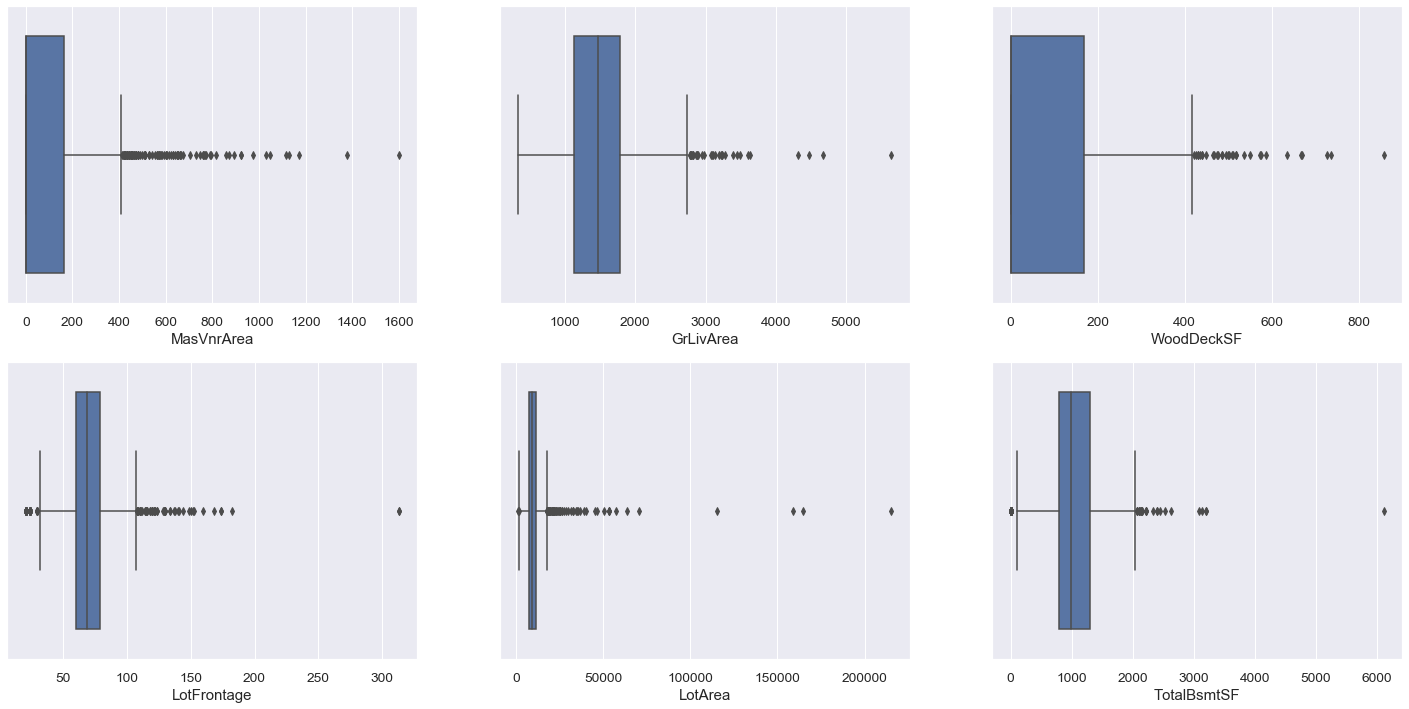

In [72]:
#Plotting boxplot for sample Numerical features to show outliers
plt.figure(figsize=(25, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'MasVnrArea',data = housing1)
plt.subplot(2,3,2)
sns.boxplot(x = 'GrLivArea', data = housing1)
plt.subplot(2,3,3)
sns.boxplot(x = 'WoodDeckSF', data = housing1)
plt.subplot(2,3,4)
sns.boxplot(x = 'LotFrontage', data = housing1)
plt.subplot(2,3,5)
sns.boxplot(x = 'LotArea', data = housing1)
plt.subplot(2,3,6)
sns.boxplot(x = 'TotalBsmtSF', data = housing1)
plt.show()

### How to deal with Outliers??
 - Manual way (not recommended): Visually inspect the data and remove outliers
 - Recommended way: Use __RobustScalar__ that will just scale the features using statistics that are robust to outliers or use __Min-Max Scalar__ which can rescale the data in range of [0,1] 
 - Use __Automatic Outlier Detection__ like **LOF (Local Outlier Factor)** or **IsolationForest**
 
 We will try different approaches and we will see which yields better results

<a id=section403></a>
### 4.3 Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [73]:
#Find the Cardinality in the Categorical Features
for x in qual_col:
    print ('The feature is {} and number of categories are {}'.format(x,housing1[x].nunique()))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

**Let's check BoxPlots for Categorical Columns with SalePrice**

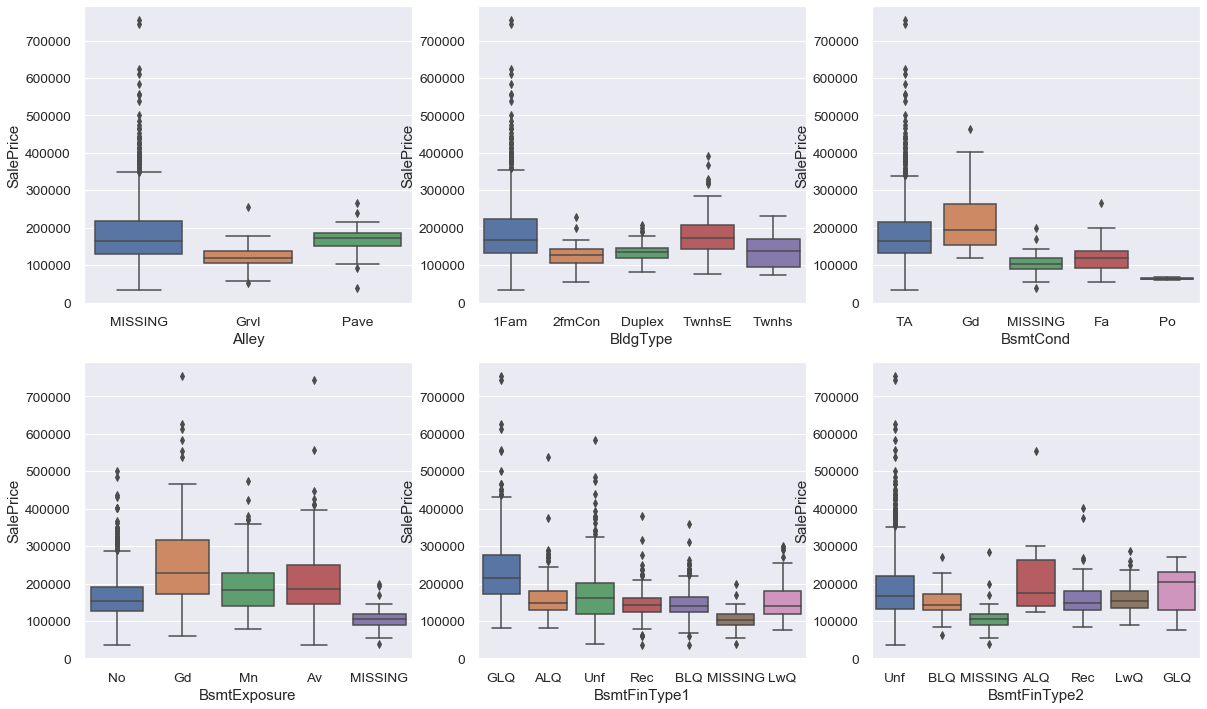

In [74]:
#Plotting boxplot for Categorical Columns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Alley', y = 'SalePrice', data = housing1)
plt.subplot(2,3,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = housing1)
plt.subplot(2,3,3)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = housing1)
plt.subplot(2,3,4)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = housing1)
plt.subplot(2,3,5)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = housing1)
plt.subplot(2,3,6)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = housing1)
plt.show()

- __Missing Value__ in __Alley__ seems to have an impact on the SalePrice
- __Townhouses__ are slightly expensive than other kinds


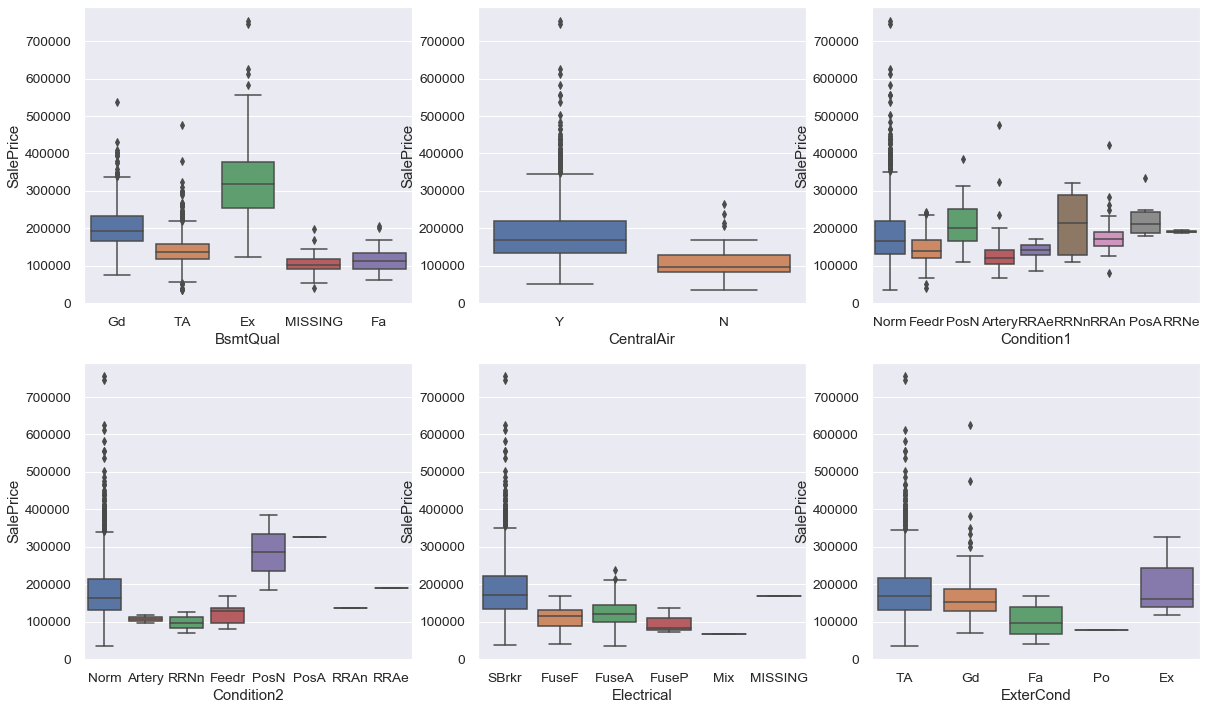

In [75]:
#Plotting boxplot for Categorical Columns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = housing1)
plt.subplot(2,3,2)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = housing1)
plt.subplot(2,3,3)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = housing1)
plt.subplot(2,3,4)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = housing1)
plt.subplot(2,3,5)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = housing1)
plt.subplot(2,3,6)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = housing1)
plt.show()

- Having __Basement__ especially with __Excellent__ quality does increase the SalePrice significantly
- Having __CentralAir__ have an impact on the SalePrice 

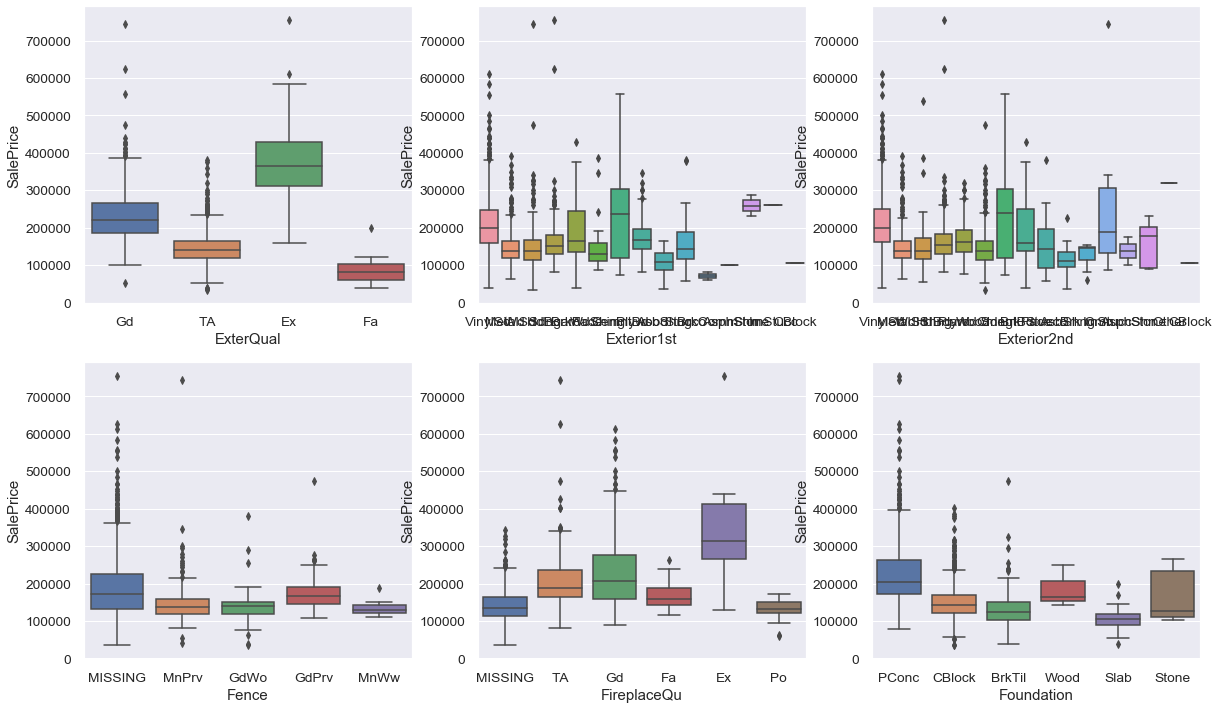

In [76]:
#Plotting boxplot for Categorical Columns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = housing1)
plt.subplot(2,3,2)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = housing1)
plt.subplot(2,3,3)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = housing1)
plt.subplot(2,3,4)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = housing1)
plt.subplot(2,3,5)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = housing1)
plt.subplot(2,3,6)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing1)
plt.show()

- Having excellent __Exterior material Quality__ and having a  __Fireplace__ does have a signifiant impact on SalePrice

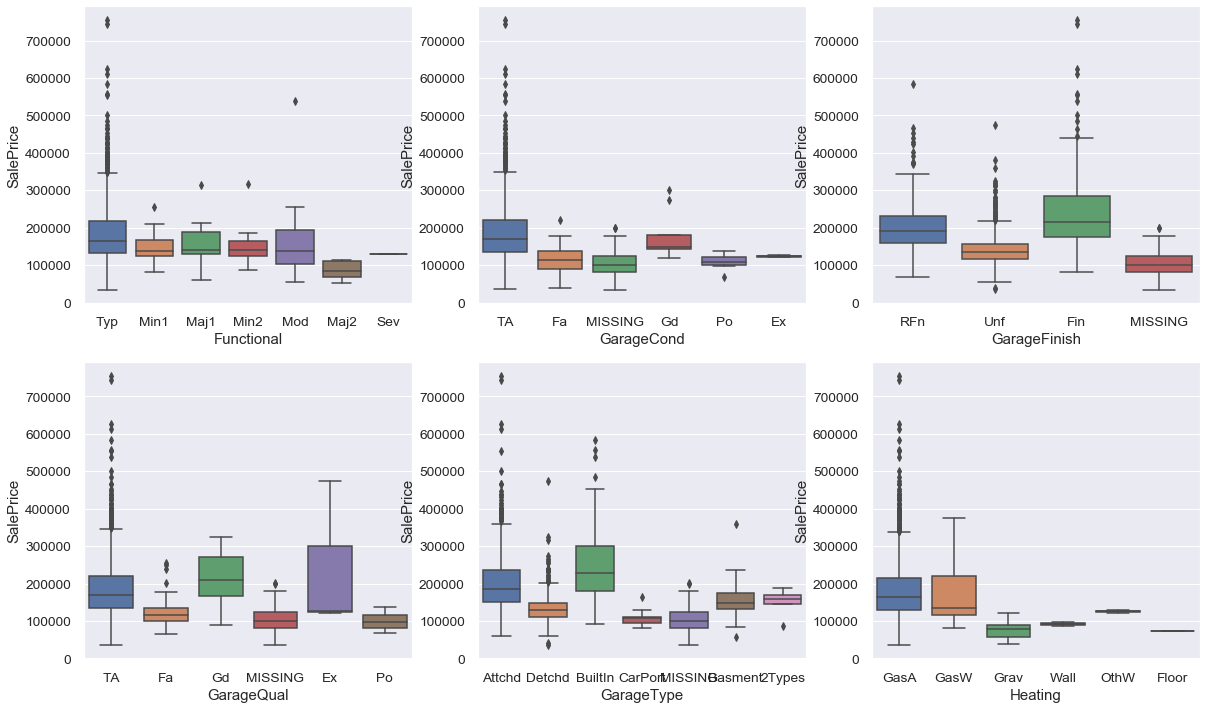

In [77]:
#Plotting boxplot for Categorical Columns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = housing1)
plt.subplot(2,3,2)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = housing1)
plt.subplot(2,3,3)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housing1)
plt.subplot(2,3,4)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = housing1)
plt.subplot(2,3,5)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housing1)
plt.subplot(2,3,6)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = housing1)
plt.show()

- __MISSING__ values in various Garage attributes points to lowest median SalePrice and could be reason because of missing Garage at the Property 

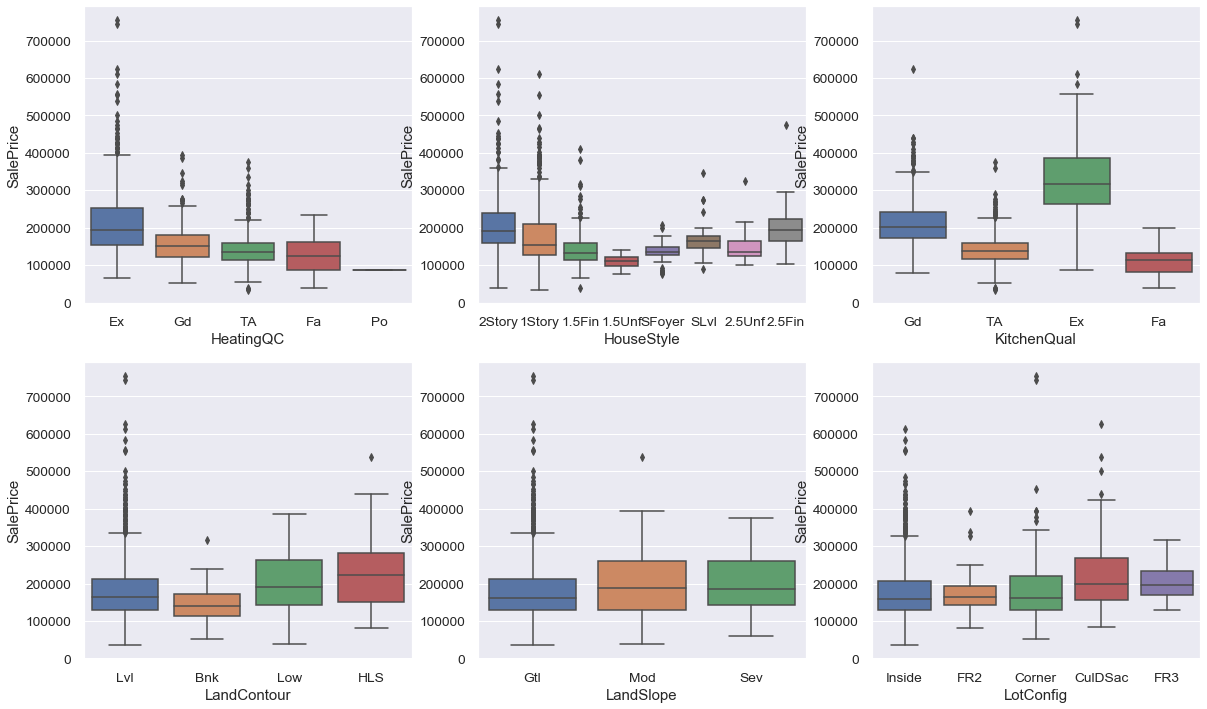

In [78]:
#Plotting boxplot for Categorical Columns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = housing1)
plt.subplot(2,3,2)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = housing1)
plt.subplot(2,3,3)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = housing1)
plt.subplot(2,3,4)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = housing1)
plt.subplot(2,3,5)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = housing1)
plt.subplot(2,3,6)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = housing1)
plt.show()

- __KitchenQual__ has an impact on the SalePrice

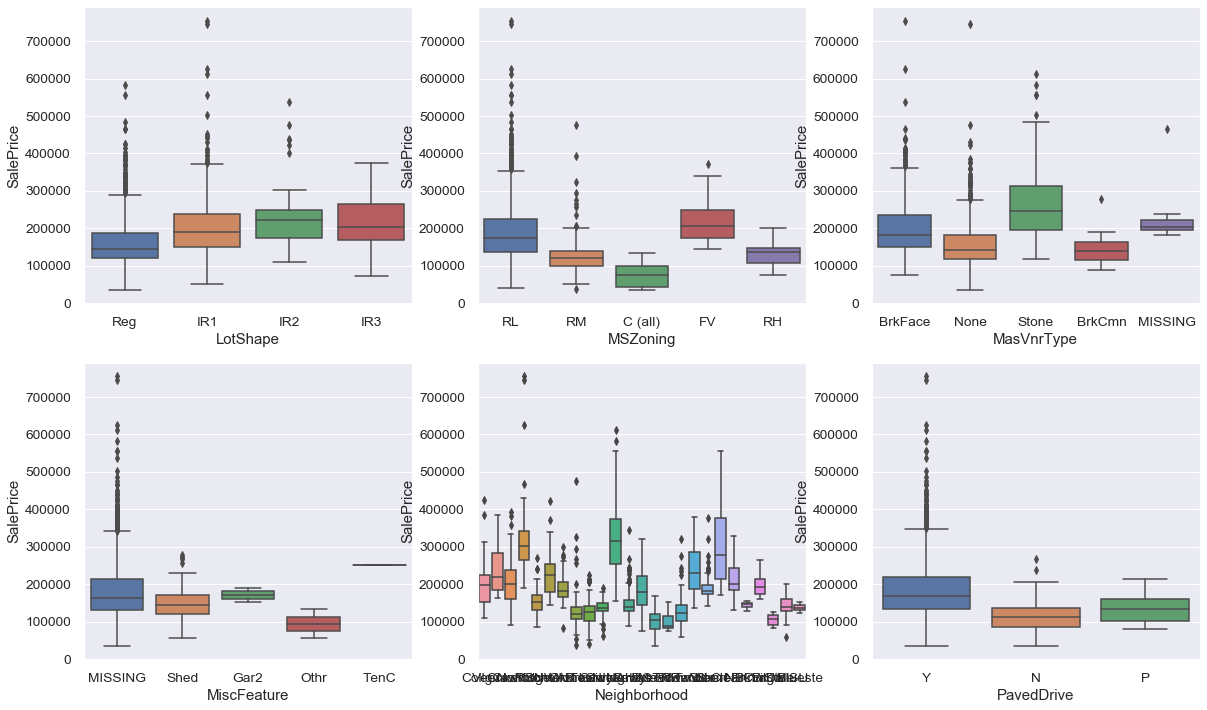

In [79]:
#Plotting boxplot for Categorical Columns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = housing1)
plt.subplot(2,3,2)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = housing1)
plt.subplot(2,3,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = housing1)
plt.subplot(2,3,4)
sns.boxplot(x = 'MiscFeature', y = 'SalePrice', data = housing1)
plt.subplot(2,3,5)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = housing1)
plt.subplot(2,3,6)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = housing1)
plt.show()

- __Neighborhood, MSZoning, MasVnrType__ have an impact on the SalePrice

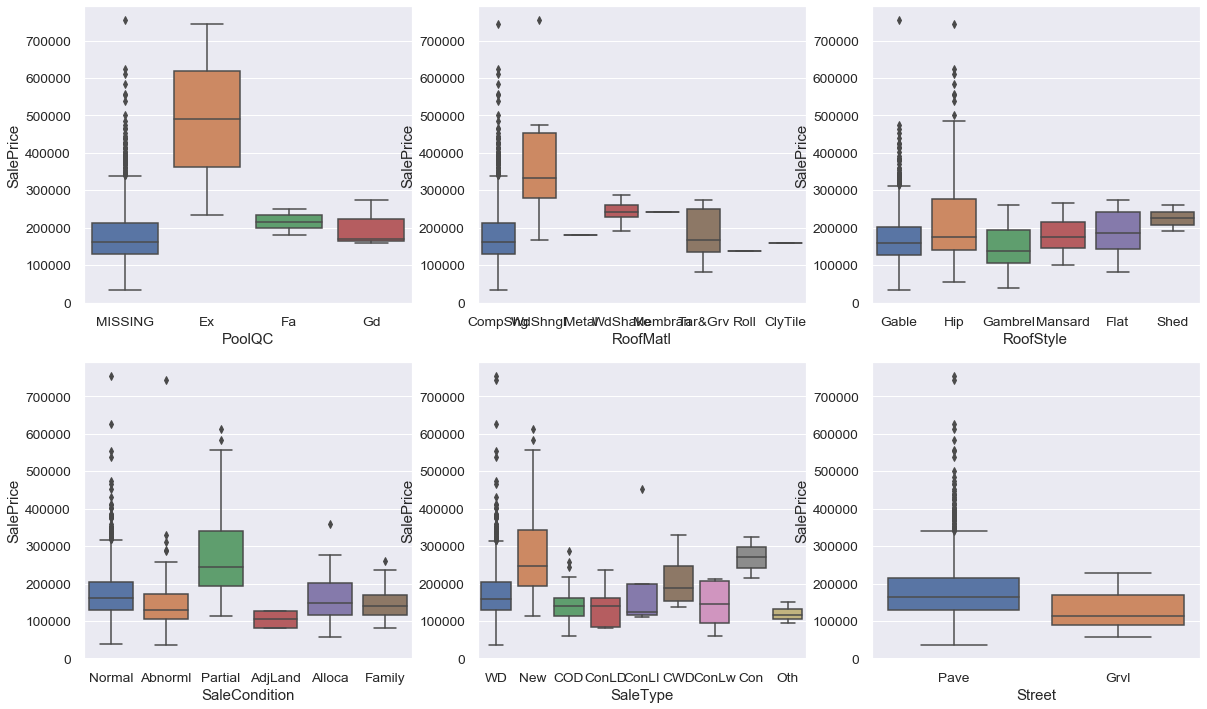

In [80]:
#Plotting boxplot for Categorical Columns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = housing1)
plt.subplot(2,3,2)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = housing1)
plt.subplot(2,3,3)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = housing1)
plt.subplot(2,3,4)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = housing1)
plt.subplot(2,3,5)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = housing1)
plt.subplot(2,3,6)
sns.boxplot(x = 'Street', y = 'SalePrice', data = housing1)
plt.show()

- __PoolQC, RoofMatl, SaleCondition, SaleType__ has a __significant__ affect on the SalePrice

Some categories seem to more diverse with respect to SalePrice than others. Neighborhood has big impact on house prices. Having pool on property seems to improve price substantially. There are also differences in variabilities between category values.

__Neighborhood__

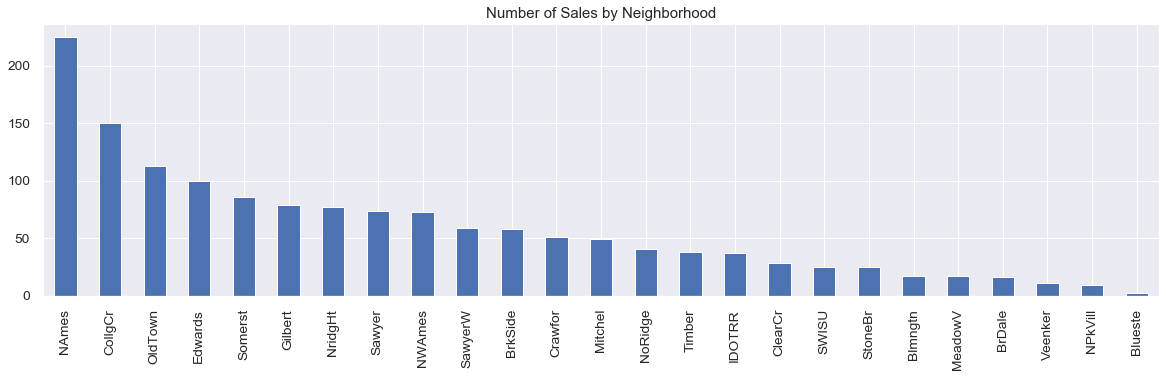

In [81]:
plt.figure(figsize=(20, 5))
housing1.Neighborhood.value_counts().plot(kind='bar', title='Number of Sales by Neighborhood')
plt.show()

- Prices are affected by the neighborhood. The more similar, the more they attract

__Utilities__

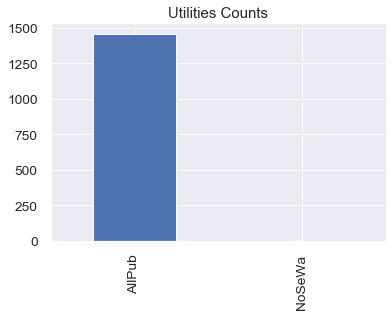

In [82]:
housing1['Utilities'].value_counts().plot.bar()
plt.title('Utilities Counts')
plt.show()

- For this categorical feature all records are "AllPub", except for one "NoSeWa". This feature won't help in predictive modeling so we can then safely drop it.

<a id=section5></a>
## 5 Data Preparation

- __Handling variables with a clear, ordered relationship (Label Encoding Categorical Features)__ <br>
  In order to fit a regression line, we would need numerical values and not string.
  For these string variables that take on ordinal values or we can easily convert them to a numeric rank.

 For example, the central air variable can be changed to '1' for 'yes' and '0' for 'no.' Similarly, we can do the same with a quality scale. The 'exterior condition' column takes on 5 values with a scale ranging from "poor" to "excellent". These can be converted by assigning each category a numeric value. For example:

 Excellent = 5
Good = 4
TA (typical/average in the data dictionary) = 3
Fair = 2
Poor = 1 
Missing = 0

<br/>

 - __Handling variables without a clear, ordered relationship (One Hot Encode Categorical Features)__ <br>
 Convert Categorial variables to dummy data so that the model can understand the data better
 <br/>
 
 - __Adding new Features identified as part of EDA__
 <br>
 
 - __Dropping Features which are redundant or identfied as of least value to the model as per EDA__

<a id=section501></a>
### 5.1 Label Encoding Categorical Features

In [83]:
#List Ordinal Categorical Features and print their unique values
label_col=['GarageQual','BsmtQual','BsmtCond','HeatingQC','FireplaceQu','GarageCond','KitchenQual','ExterQual',
          'ExterCond','GarageFinish','LandSlope','PavedDrive','LotShape','BsmtFinType1','Functional','CentralAir']
for x in label_col:
    print ('The feature is {} and number of categories are {}'.format(x,housing1[x].unique()))

The feature is GarageQual and number of categories are ['TA' 'Fa' 'Gd' 'MISSING' 'Ex' 'Po']
The feature is BsmtQual and number of categories are ['Gd' 'TA' 'Ex' 'MISSING' 'Fa']
The feature is BsmtCond and number of categories are ['TA' 'Gd' 'MISSING' 'Fa' 'Po']
The feature is HeatingQC and number of categories are ['Ex' 'Gd' 'TA' 'Fa' 'Po']
The feature is FireplaceQu and number of categories are ['MISSING' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
The feature is GarageCond and number of categories are ['TA' 'Fa' 'MISSING' 'Gd' 'Po' 'Ex']
The feature is KitchenQual and number of categories are ['Gd' 'TA' 'Ex' 'Fa']
The feature is ExterQual and number of categories are ['Gd' 'TA' 'Ex' 'Fa']
The feature is ExterCond and number of categories are ['TA' 'Gd' 'Fa' 'Po' 'Ex']
The feature is GarageFinish and number of categories are ['RFn' 'Unf' 'Fin' 'MISSING']
The feature is LandSlope and number of categories are ['Gtl' 'Mod' 'Sev']
The feature is PavedDrive and number of categories are ['Y' 'N' 'P']
The fea

In [84]:
housing_data=housing1.copy()

In [85]:
housing_data.shape

(1460, 96)

In [86]:
# applying label encoding to ordinal categorical columns:
#Excellent = 5 Good = 4 TA (typical/average in the data dictionary) = 3 Fair = 2 Poor = 1 Missing = 0
housing_data['GarageQual'] = housing_data['GarageQual'].map({'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['BsmtQual'] = housing_data['BsmtQual'].map({'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['BsmtCond'] = housing_data['BsmtCond'].map({'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['HeatingQC'] = housing_data['HeatingQC'].map({'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['FireplaceQu'] = housing_data['FireplaceQu'].map({'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['GarageCond'] = housing_data['GarageCond'].map({'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['KitchenQual'] = housing_data['KitchenQual'].map({'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['ExterQual'] = housing_data['ExterQual'].map({'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['ExterCond'] = housing_data['ExterCond'].map({'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

housing_data['CentralAir'] = housing_data['CentralAir'].map({'Y':1,'N':0}) 

housing_data['GarageFinish'] = housing_data['GarageFinish'].map(
    {'MISSING':0,    #No garage
     'Unf':1,        #Unfinished
     'RFn':2,        #Rough Finished
     'Fin':3         #Finished
    })


housing_data['LandSlope'] = housing_data['LandSlope'].map(
    {'Sev':1,       #Severe
     'Mod':2,       #Moderate
     'Gtl':3        #Gentle slope
    })

housing_data['PavedDrive'] = housing_data['PavedDrive'].map(
    {'N':1,         #Dirt/Gravel
     'P':2,         #Partial Pavement
     'Y':3          #Paved
    })   

housing_data['LotShape'] = housing_data['LotShape'].map(
    {'IR3':1,       #Irregular
     'IR2':2,       #Moderately irregular
     'IR1':3,       #Slightly Irregular
     'Reg':4        #Regular
    }) 


housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].map(
    {'MISSING':0,  #No Basement
     'Unf':1,      #Unfinished
     'LwQ':2,      #Low Quality
     'Rec':3,      #Average Rec Room
     'BLQ':4,      #Below Average Living Quarter
     'ALQ':5,      #Average Living Quarter
     'GLQ':6       #Good Living Quarter
    })

#Housing Functional types 
housing_data['Functional'] = housing_data['Functional'].map(
    {'Sal':0,     #Salvage only
     'Sev':1,     #Severly Damaged
     'Maj2':2,    #Major Deductions 2
     'Maj1':3,    #Major Deductions 1
     'Mod':4,     #Moderate Deductions
     'Min2':5,    #Minor Deductions 2
     'Min1':6,    #Minor Deductions 1
     'Typ':7      #Typical Functionality
    })


In [87]:
housing_data[label_col].head()

,GarageQual,BsmtQual,BsmtCond,HeatingQC,FireplaceQu,GarageCond,KitchenQual,ExterQual,ExterCond,GarageFinish,LandSlope,PavedDrive,LotShape,BsmtFinType1,Functional,CentralAir
0,3,4,3,5,0,3,4,4,3,2,3,3,4,6,7,1
1,3,4,3,5,3,3,3,3,3,2,3,3,4,5,7,1
2,3,4,3,5,3,3,4,4,3,2,3,3,3,6,7,1
3,3,3,4,4,4,3,4,3,3,1,3,3,3,5,7,1
4,3,4,3,5,3,3,4,4,3,2,3,3,3,6,7,1


In [88]:
housing_data.shape

(1460, 96)

<a id=section502></a>
### 5.2 One Hot Encode Categorical Features

In [89]:
# Let's create dummies and drop the first column from status df using 'drop_first = True'
dummy_qual_col=['MSZoning','Street','LandContour','LotConfig','Neighborhood','BldgType','MasVnrType',
                'RoofMatl','Foundation','BsmtExposure','SaleCondition','Heating',
               'SaleType','GarageType']
status = pd.get_dummies(housing_data[dummy_qual_col], drop_first = True)

In [90]:
# Add the results to the original housing dataframe

housing_data = pd.concat([housing_data, status], axis = 1)

In [91]:
housing_data.shape

(1460, 180)

In [92]:
housing_data.drop((dummy_qual_col), axis = 1, inplace = True)

In [93]:
housing_data.shape

(1460, 166)

<a id=section503></a>
### 5.3 Drop Categorical Features

In [94]:
# Drop Categorical features with too many missing values or irrelevant information
drop_qual_col=['Alley','PoolQC','Fence','MiscFeature','Condition1','Condition2','BsmtFinType2',
               'Electrical','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','Utilities']

housing_data.drop((drop_qual_col), axis = 1, inplace = True)

In [95]:
housing_data.shape

(1460, 153)

<a id=section504></a>
### 5.4 Add new Features

In [96]:
#Adding Remod Feature with value (1/0)
housing_data['HasRemod'] = 2
housing_data.loc[(housing_data.YearBuilt==housing_data.YearRemodAdd), ['HasRemod']] = 0  #No Remodeling
housing_data.loc[(housing_data.YearBuilt!=housing_data.YearRemodAdd), ['HasRemod']] = 1  #Remodeled

In [97]:
#Calculating the age of the house 
housing_data['YearBuilt']=housing_data['YrSold'] - housing_data['YearBuilt']

In [98]:
housing_data['HasRemod'].value_counts()

0    764
1    696
Name: HasRemod, dtype: int64

In [99]:
#Adding new feature Total Bathroom
housing_data ['TotBathrooms'] = housing_data.FullBath + (housing_data.HalfBath*0.5) + housing_data.BsmtFullBath + (housing_data.BsmtHalfBath*0.5)


In [100]:
housing_data.shape

(1460, 155)

In [101]:
housing_data.head() #Check if there are any non-numeric attributes

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage_NAN,GarageYrBlt_NAN,MasVnrArea_NAN,HasBasement,HasGarage,Has2ndFloor,HasMasVnr,HasWoodDeck,HasPorch,Has3SsnPorch,HasEnclosedPorch,HasPool,HasFence,HasAlley,HasMiscFeature,IsNew,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,MasVnrType_BrkFace,MasVnrType_MISSING,MasVnrType_None,MasVnrType_Stone,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_MISSING,BsmtExposure_Mn,BsmtExposure_No,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_MISSING,HasRemod,TotBathrooms
0,60,65.0,8450,4,3,7,5,5,2003,196.0,4,3,4,3,6,706,0,150,856,5,1,856,854,0,1710,1,0,2,1,3,1,4,8,7,0,0,2003.0,2,2,548,3,3,3,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,3.5
1,20,80.0,9600,4,3,6,8,31,1976,0.0,3,3,4,3,5,978,0,284,1262,5,1,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,3,1976.0,2,2,460,3,3,3,298,0,0,0,0,0,0,5,2007,181500,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2.5
2,60,68.0,11250,3,3,7,5,7,2002,162.0,4,3,4,3,6,486,0,434,920,5,1,920,866,0,1786,1,0,2,1,3,1,4,6,7,1,3,2001.0,2,2,608,3,3,3,0,42,0,0,0,0,0,9,2008,223500,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,3.5
3,70,60.0,9550,3,3,7,5,91,1970,0.0,3,3,3,4,5,216,0,540,756,4,1,961,756,0,1717,1,0,1,0,3,1,4,7,7,1,4,1998.0,1,3,642,3,3,3,0,35,272,0,0,0,0,2,2006,140000,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,2.0
4,60,84.0,14260,3,3,8,5,8,2000,350.0,4,3,4,3,6,655,0,490,1145,5,1,1145,1053,0,2198,1,0,2,1,4,1,4,9,7,1,3,2000.0,2,3,836,3,3,3,192,84,0,0,0,0,0,12,2008,250000,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,

__Dropping Numerical Features__

In [102]:
housing_data.drop((rejected_num_cols), axis = 1, inplace = True)

In [103]:
housing_data.shape

(1460, 133)

In [104]:
housing_data.drop((rejected_new_features), axis = 1, inplace = True)

In [105]:
housing_data.shape

(1460, 131)

<a id=section6></a>
### 6 Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [106]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X, y = train_test_split(housing_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [107]:
y.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SalePrice,LotFrontage_NAN,MasVnrArea_NAN,HasBasement,HasGarage,HasMasVnr,HasWoodDeck,HasPorch,Has3SsnPorch,HasEnclosedPorch,HasPool,HasFence,HasAlley,HasMiscFeature,IsNew,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,MasVnrType_BrkFace,MasVnrType_MISSING,MasVnrType_None,MasVnrType_Stone,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_MISSING,BsmtExposure_Mn,BsmtExposure_No,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_MISSING,HasRemod,TotBathrooms
1436,20,60.0,9000,4,3,4,36,0.0,3,3,3,3,5,616,864,3,1,0,864,3,7,0,0,1,2,3,3,3,0,0,120500,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1.0
57,60,89.0,11645,3,3,7,2,0.0,4,3,4,3,1,0,860,5,1,860,1720,4,7,0,0,2,2,3,3,3,0,70,196500,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2.5
780,20,63.0,7875,4,3,7,12,38.0,3,3,4,4,1,0,1237,4,1,0,1253,3,7,1,3,3,2,3,3,3,220,21,176000,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,2.0
382,60,79.0,9245,3,3,7,1,0.0,4,3,4,3,1,0,939,5,1,858,1797,4,7,0,0,2,2,3,3,3,144,53,213500,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2.5
1170,80,76.0,9880,4,3,6,31,0.0,3,3,3,3,5,522,1096,3,1,0,1118,3,7,1,1,3,1,3,3,3,203,0,171000,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2.0


<a id=section601></a>
### 6.1 Rescaling the Features 

Here we can see that housing dataset has many variables with many ranging integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are many common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 
3. Robust Scaling

Also, Min-Max scaling is __highly influenced__ by the maximum and minimum values in our data so if our data contains __outliers__ it is going to be __biased__.

So, we will go with __RobustScalar__ which uses __median__ values unlike __StandardScalar__ which uses __mean__ and because we have seen outliers in our data and it will help to scale the features using statistics that are robust to outliers.


In [108]:
from sklearn.preprocessing import RobustScaler

In [109]:
scaler = RobustScaler()

In [110]:
label_col

['GarageQual',
 'BsmtQual',
 'BsmtCond',
 'HeatingQC',
 'FireplaceQu',
 'GarageCond',
 'KitchenQual',
 'ExterQual',
 'ExterCond',
 'GarageFinish',
 'LandSlope',
 'PavedDrive',
 'LotShape',
 'BsmtFinType1',
 'Functional',
 'CentralAir']

In [111]:
 # Apply scaler() to all the columns except the 'yes-no', 'dummy', label_encoded variables

num_vars = [x for x in housing_data.columns if housing_data[x].nunique()!=2]

for x in num_vars:
    if x in label_col:
        num_vars.remove(x)
    else:
        pass

num_vars

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'LandSlope',
 'OverallQual',
 'YearBuilt',
 'MasVnrArea',
 'ExterCond',
 'BsmtCond',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'Functional',
 'Fireplaces',
 'GarageFinish',
 'GarageCars',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'TotBathrooms']

In [112]:
X[num_vars] = scaler.fit_transform(X[num_vars])

In [113]:
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SalePrice,LotFrontage_NAN,MasVnrArea_NAN,HasBasement,HasGarage,HasMasVnr,HasWoodDeck,HasPorch,Has3SsnPorch,HasEnclosedPorch,HasPool,HasFence,HasAlley,HasMiscFeature,IsNew,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,MasVnrType_BrkFace,MasVnrType_MISSING,MasVnrType_None,MasVnrType_Stone,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_MISSING,BsmtExposure_Mn,BsmtExposure_No,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_MISSING,HasRemod,TotBathrooms
210,-0.4,-0.111111,-0.958190,4,0.0,-0.5,1.065217,0.000000,3,0.0,3,0.0,3,0.106742,-0.245681,3,0,0.000000,-0.949527,3,0.0,-1.0,0,-2.0,-2.0,0,-3.0,3,0.000000,-0.357143,-0.733728,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0
318,0.2,1.166667,0.098377,4,-1.0,0.5,-0.391304,1.620253,4,0.0,4,0.0,6,0.835674,0.681382,5,1,1.752407,1.861199,4,0.0,0.0,3,0.0,1.0,3,0.0,3,2.023810,0.500000,1.183432,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,3.0
239,0.0,-0.944444,-0.186670,4,0.0,0.0,0.673913,0.000000,3,0.0,3,-1.0,2,-0.418539,-0.493282,3,1,0.947730,0.033123,3,0.0,0.0,4,-1.0,-1.0,3,0.0,3,0.000000,1.642857,-0.556213,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,-1.0
986,0.0,-0.555556,-1.030497,4,0.0,0.0,1.347826,0.000000,3,1.0,3,-1.0,1,-0.550562,-0.973129,4,1,0.872077,0.266562,4,0.0,-1.0,0,-1.0,-1.0,2,0.0,3,2.345238,-0.357143,-0.508876,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,-2.0
1416,2.8,-0.500000,0.452533,4,0.0,-1.0,1.978261,0.000000,3,0.0,3,0.0,1,-0.550562,-0.412668,4,1,1.436039,1.299685,3,0.0,-1.0,0,-1.0,0.0,3,0.0,1,0.000000,-0.357143,-0.443787,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0.0


<a id=section602></a>
### 6.2 Dividing into X and Y sets for the model building

In [114]:
y_train = X.pop('SalePrice')
X_train = X

<a id=section7></a>
## 7 Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

<a id=section701></a>
### 7.1 Building a linear model with Manual Feature Selection Approach

In [115]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()


In [116]:
# Check the parameters obtained

lr.params

const                -5.910023
MSSubClass           -0.137639
LotFrontage           0.018304
LotArea               0.013540
LotShape              0.010111
                        ...   
GarageType_CarPort    0.143129
GarageType_Detchd     0.124366
GarageType_MISSING   -2.703681
HasRemod              0.053522
TotBathrooms          0.012550
Length: 131, dtype: float64

In [117]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     63.73
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:24:17   Log-Likelihood:                -201.98
No. Observations:                1021   AIC:                             660.0
Df Residuals:                     893   BIC:                             1291.
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.91

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for LotShape is 0.0101, with a very high p value (0.646)
The coefficient is statistically insignificant. So the association is purely by chance. 

##### 2. R - squared is 0.901
Meaning that 90.1% of the variance in `SalePrice` is explained by `130 Features`

This is a decent R-squared value but with too many features.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

Let's visualize how well the model fit the training data.

In [118]:
y_train_price1 = lr.predict(X_train_lm)

In [119]:
# calculate these metrics by hand for Training Data
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_train, y_train_price1))
print('MSE:', metrics.mean_squared_error(y_train, y_train_price1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_price1)))

MAE: 0.18913573229823266
MSE: 0.08696634216772102
RMSE: 0.2949005631865104


This is the First Model Built and below are few points to remember:

- The R-squared value obtained is 0.901 which is very good. But, Since we have 130 predictor variables, we can clearly see lot of variables are having p_value >0.05 which means many variables are insignificant and could have multicollinearity. So let's go ahead and start removing variables.

- We have to remove variable one by one to understand the affect on the other variables

- The below approach will be time taking and will consider all 130 variables 

As you can see there are strong Multicollinearity affects in the model and it affects the following:

- __Interpretation of variables__ <br>
  Does “change in Y when all others are held constant” apply?
- __Inference__  <br>
  Coefficients swing wildly, signs can invert.<br>
<br>

__We will use a combination of p-values and VIF to handle multicollinearity and drop features which are having p-value > 0.05 and/or VIF < 5__

In [120]:
#After dropping feature one by one, we came across the below features which can be dropped
drop_x = ['HasAlley','LotConfig_Inside','OpenPorchSF','HasMasVnr','Foundation_Slab',
                          'Neighborhood_Gilbert','MasVnrType_Stone','MasVnrType_BrkFace','Neighborhood_Sawyer',
                         'SaleType_ConLw','Neighborhood_CollgCr','SaleType_ConLI','Neighborhood_Timber',
                          'Neighborhood_Mitchel','Foundation_PConc','MasVnrType_MISSING','GarageType_MISSING',
                         'Heating_GasA','Street_Pave','GarageType_Attchd','LotShape','PavedDrive','SaleType_WD',
                         'CentralAir','BsmtExposure_MISSING','GarageCond','2ndFlrSF','FireplaceQu','BsmtFinType1',
                         'HasWoodDeck','BldgType_TwnhsE','IsNew','GarageType_Basment','LotFrontage_NAN','Heating_Grav',
                         'SaleType_CWD','Neighborhood_NWAmes','Heating_GasW','GarageType_CarPort','SaleType_Oth','ExterCond'
                         ,'LotConfig_FR3','Neighborhood_NAmes','Foundation_Wood','Neighborhood_SawyerW','SaleCondition_Family'
                         ,'MasVnrArea_NAN','GarageType_Detchd','WoodDeckSF','HasFence','GarageType_BuiltIn','HasMiscFeature',
                         'HasPorch','Neighborhood_Blueste','BsmtCond','BldgType_Twnhs','Has3SsnPorch','Neighborhood_ClearCr',
                         'BldgType_2fmCon','LandSlope','Neighborhood_MeadowV','Neighborhood_OldTown','Neighborhood_IDOTRR',
                         'Neighborhood_SWISU','HasEnclosedPorch','Neighborhood_NPkVill','Neighborhood_Veenker','Neighborhood_BrkSide',
                         'Foundation_Stone','Heating_Wall','SaleCondition_AdjLand','SaleType_ConLD','YearBuilt','LotFrontage',
                         'LandContour_Low','Neighborhood_BrDale','SaleType_New','MSZoning_FV','SaleCondition_Alloca','Fireplaces',
                         'HeatingQC','LotConfig_FR2','BsmtExposure_Mn','SaleType_Con','RoofMatl_CompShg','RoofMatl_WdShake',
                         'RoofMatl_Roll','TotalBsmtSF','RoofMatl_Metal','RoofMatl_Tar&Grv','RoofMatl_Membran',
                         'SaleCondition_Normal','HasGarage','HasBasement','GarageQual','BldgType_Duplex',
                         'ExterQual','Foundation_CBlock','MasVnrType_None','MasVnrArea',
                         'MSZoning_RM','MSZoning_RH','BsmtQual','LandContour_Lvl','LandContour_HLS','LotArea',
                         'MSZoning_RL','HasPool','HasRemod']

In [121]:
# Removing feature 
X_train_1 = X_train.drop(drop_x,axis=1)


In [122]:
# Build a linear model

import statsmodels.api as sm
X_train_1 = sm.add_constant(X_train_1)

lr_2 = sm.OLS(y_train, X_train_1).fit()

lr_2.params

const                   -0.388013
MSSubClass              -0.149154
OverallQual              0.308682
BsmtFinSF1               0.059446
GrLivArea                0.320146
KitchenQual              0.160420
Functional               0.055320
GarageFinish             0.058300
GarageCars               0.071792
LotConfig_CulDSac        0.194391
Neighborhood_Crawfor     0.354554
Neighborhood_Edwards    -0.140774
Neighborhood_NoRidge     0.728908
Neighborhood_NridgHt     0.637104
Neighborhood_Somerst     0.263975
Neighborhood_StoneBr     0.439151
RoofMatl_WdShngl         1.119673
BsmtExposure_Gd          0.288502
BsmtExposure_No         -0.123329
SaleCondition_Partial    0.154621
Heating_OthW            -0.847781
TotBathrooms             0.062445
dtype: float64

In [123]:
# Print a summary of the linear regression model obtained
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     266.8
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:24:50   Log-Likelihood:                -416.71
No. Observations:                1021   AIC:                             877.4
Df Residuals:                     999   BIC:                             985.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.38

In [124]:
X_train_new = X_train_1.drop(['const'], axis=1)

__Checking the variance inflation factor (VIF)__
- Sometimes, pairwise correlations are not enough.
- Instead of just one variable, the independent variable may depend upon a combination of other variables.
- VIF calculates how well one independent variable is explained by all the other independent variables combined.

In [125]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,KitchenQual,4.81
17,BsmtExposure_No,3.39
1,OverallQual,2.72
20,TotBathrooms,2.45
3,GrLivArea,2.19
7,GarageCars,2.16
6,GarageFinish,1.98
16,BsmtExposure_Gd,1.54
2,BsmtFinSF1,1.51
12,Neighborhood_NridgHt,1.48


In [126]:
pd.DataFrame({
     
    'Coeffecient':lr_2.params
}).round(decimals=2).sort_values('Coeffecient',ascending=False).style.bar(color=['grey','lightblue'],align='zero')


,Coeffecient
RoofMatl_WdShngl,1.120000
Neighborhood_NoRidge,0.730000
Neighborhood_NridgHt,0.640000
Neighborhood_StoneBr,0.440000
Neighborhood_Crawfor,0.350000
GrLivArea,0.320000
OverallQual,0.310000
BsmtExposure_Gd,0.290000
Neighborhood_Somerst,0.260000
LotConfig_CulDSac,0.190000


Now we have ran our first model and also removed the multicollinearity. Let's compare <br>

| Features   | First manual model  |         Second/updated manual model                                    |
| ------------- |:------------- | :----------------------- :|
| Total Variables   | 130         | 21 |
| R-squared          | .901         | .849                                | 
| Adjusted R-squared | .887         |  .845|
| RMSE(train data)  | 0.29         |    0.36                                       | 
|MAE(train data) |   0.19                      |0.23 |
|MSE(train data)  |   0.09                    | 0.13|

As you can see __Second Model__ performs much better even after dropping 109 features. Though its having a lower R-squared value but its not dropped significantly in comparison to the First Model. Also, the Adjusted R-Squared value is quite close to original R-Squared value and total number of features is significantly less than the First model. <br>

We will use the Second Model to __evaluate our analysis__ on the __Test Data__

<a id=section702></a>
### 7.2 Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [127]:
y_train_price = lr_2.predict(X_train_1)

Text(0.5, 0, 'Errors')

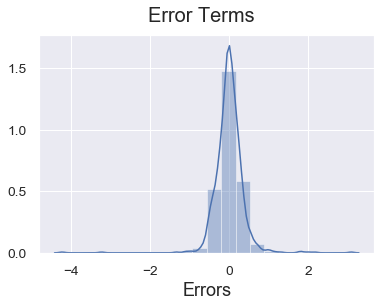

In [128]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label



 - The error terms looks __normally distributed__

<a id=section703></a>
### 7.3 Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. second model.

#### Applying the scaling on the test sets

In [129]:
y[num_vars] = scaler.transform(y[num_vars])

In [130]:
y.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SalePrice,LotFrontage_NAN,MasVnrArea_NAN,HasBasement,HasGarage,HasMasVnr,HasWoodDeck,HasPorch,Has3SsnPorch,HasEnclosedPorch,HasPool,HasFence,HasAlley,HasMiscFeature,IsNew,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,MasVnrType_BrkFace,MasVnrType_MISSING,MasVnrType_None,MasVnrType_Stone,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_MISSING,BsmtExposure_Mn,BsmtExposure_No,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_MISSING,HasRemod,TotBathrooms
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.00000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.0,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.0,438.0,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.065753,0.086504,0.268240,3.605023,-0.057078,0.058219,0.055638,0.633880,3.388128,0.066210,3.511416,-0.050228,3.436073,0.057632,0.105991,4.134703,0.952055,0.489451,0.070485,3.513699,-0.180365,-0.351598,1.892694,-0.271689,-0.239726,2.824201,-0.175799,2.865297,0.584502,0.298467,0.258424,0.187215,0.009132,0.981735,0.947489,0.40411,0.495434,0.547945,0.011416,0.127854,0.006849,0.219178,0.061644,0.034247,0.253425,0.045662,0.006849,0.794521,0.146119,0.995434,0.034247,0.015982,0.904110,0.063927,0.036530,0.002283,0.744292,0.002283,0.009132,0.043379,0.018265,0.111872,0.043379,0.052511,0.059361,0.018265,0.018265,0.0

#### Dividing into X_test and y_test

In [131]:
y_test = y.pop('SalePrice')
X_test = y

In [132]:
# Adding constant variable to test dataframe
X_test_m2 = sm.add_constant(X_test)

In [133]:
# Creating X_test_m2 dataframe by dropping variables from X_test_m2

X_test_m2 = X_test_m2.drop(drop_x, axis = 1)

In [134]:
# Making predictions using the second model

y_pred_m2 = lr_2.predict(X_test_m2)

<a id=section704></a>
### 7.4 Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [135]:
# calculate these metrics by hand for Training Data
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_train, y_train_price))
print('MSE:', metrics.mean_squared_error(y_train, y_train_price))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_price)))

MAE: 0.22796937845939477
MSE: 0.132442925773173
RMSE: 0.36392708853996153


In [136]:
# calculate these metrics by hand for Testing Data
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_m2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_m2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m2)))

MAE: 0.2435344081718649
MSE: 0.1347041005310725
RMSE: 0.36702057235402014


Text(0, 0.5, 'y_pred')

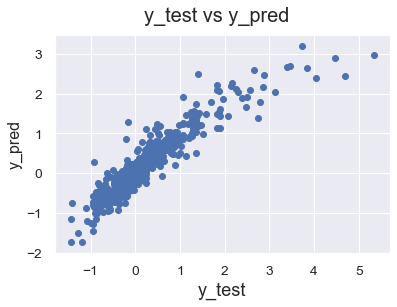

In [137]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     # Plotting y_test and y_pred to understand the spread


<a id=section8></a>

## 8 Building our model with RFE (Recursive feature elimination)

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

- The goal of Recursive Feature Elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

- RFE is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted.

In [138]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [139]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 40)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [140]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 64),
 ('LotArea', False, 72),
 ('LotShape', False, 78),
 ('LandSlope', False, 41),
 ('OverallQual', True, 1),
 ('YearBuilt', False, 27),
 ('MasVnrArea', False, 54),
 ('ExterQual', True, 1),
 ('ExterCond', False, 83),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 61),
 ('BsmtFinType1', False, 87),
 ('BsmtFinSF1', True, 1),
 ('TotalBsmtSF', False, 21),
 ('HeatingQC', False, 57),
 ('CentralAir', False, 49),
 ('2ndFlrSF', False, 35),
 ('GrLivArea', True, 1),
 ('KitchenQual', True, 1),
 ('Functional', False, 2),
 ('Fireplaces', False, 47),
 ('FireplaceQu', False, 65),
 ('GarageFinish', False, 52),
 ('GarageCars', False, 3),
 ('GarageQual', False, 18),
 ('GarageCond', False, 50),
 ('PavedDrive', False, 60),
 ('WoodDeckSF', False, 74),
 ('OpenPorchSF', False, 89),
 ('LotFrontage_NAN', False, 77),
 ('MasVnrArea_NAN', False, 14),
 ('HasBasement', True, 1),
 ('HasGarage', False, 4),
 ('HasMasVnr', False, 73),
 ('HasWoodDeck', False, 75),
 ('HasPor

In [141]:
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'OverallQual', 'ExterQual', 'BsmtQual', 'BsmtFinSF1',
       'GrLivArea', 'KitchenQual', 'HasBasement', 'HasPool',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'Neighborhood_Blueste',
       'Neighborhood_ClearCr', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'BldgType_2fmCon',
       'BldgType_Duplex', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'BsmtExposure_Gd',
       'BsmtExposure_MISSING', 'BsmtExposure_No', 'SaleCondition_Partial',
       'Heating_OthW', 'Heating_Wall', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_New', 'SaleType_WD'],
      dtype='object')

<a id=section801></a>
### 8.1 Building model using statsmodel, for the detailed statistics

In [142]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [143]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [144]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [145]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     180.1
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:25:48   Log-Likelihood:                -309.09
No. Observations:                1021   AIC:                             698.2
Df Residuals:                     981   BIC:                             895.3
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.57

__We picked top 40 attributes using RFE and now we will use again manual approach to eliminate features with multicollinearity in order to have a better model__

In [146]:
X_train_new_rfe = X_train_rfe.drop(['SaleType_CWD','BsmtExposure_MISSING','SaleType_ConLD','Heating_Wall',
                                   'Neighborhood_Blueste','Neighborhood_ClearCr','SaleType_Con','Neighborhood_MeadowV'
                                   ,'LotConfig_FR2','Neighborhood_Veenker','SaleType_New','RoofMatl_CompShg',
                                   'RoofMatl_Roll','RoofMatl_Metal','RoofMatl_WdShake','RoofMatl_Membran',
                                   'BldgType_Duplex','RoofMatl_Tar&Grv','ExterQual','Neighborhood_NPkVill',
                                   'HasBasement','KitchenQual','BsmtQual','BldgType_2fmCon','SaleType_WD'], axis = 1)

In [147]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_2 = sm.add_constant(X_train_new_rfe)

In [148]:
lm_rfe = sm.OLS(y_train,X_train_2).fit()   # Running the linear model

In [149]:
#Let's see the summary of our linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     306.7
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:26:22   Log-Likelihood:                -503.33
No. Observations:                1021   AIC:                             1039.
Df Residuals:                    1005   BIC:                             1118.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

In [150]:
X_train_new_rfe = X_train_new_rfe.drop(['const'], axis=1)

In [151]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,OverallQual,2.13
3,GrLivArea,1.78
7,Neighborhood_NridgHt,1.40
13,SaleCondition_Partial,1.34
2,BsmtFinSF1,1.32
8,Neighborhood_Somerst,1.31
6,Neighborhood_NoRidge,1.26
11,BsmtExposure_Gd,1.26
12,BsmtExposure_No,1.21
4,HasPool,1.15


In [152]:
pd.DataFrame({
     
    'Coeffecient':lm_rfe.params
}).round(decimals=2).sort_values('Coeffecient',ascending=False).style.bar(color=['grey','lightblue'],align='zero')


,Coeffecient
RoofMatl_WdShngl,1.020000
Neighborhood_NoRidge,0.720000
Neighborhood_NridgHt,0.670000
OverallQual,0.510000
Neighborhood_StoneBr,0.420000
GrLivArea,0.400000
Neighborhood_Somerst,0.320000
BsmtExposure_Gd,0.250000
SaleCondition_Partial,0.220000
LotConfig_CulDSac,0.190000


In [153]:
y_train_price_rfe = lm_rfe.predict(X_train_2)

In [154]:
y_train_price_rfe.shape

(1021,)

<a id=section802></a>
### 8.2 Residual Analysis of the train data

Text(0.5, 0, 'Errors')

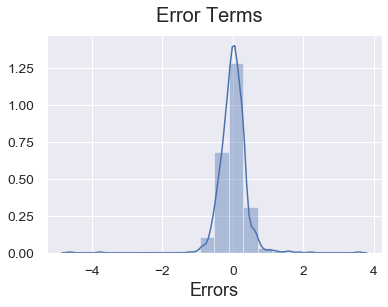

In [155]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price_rfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [156]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_new_rfe.columns]

In [157]:
# Adding constant variable to test dataframe
X_test_rfe = sm.add_constant(X_test_rfe)

In [158]:
X_test_rfe.shape

(438, 16)

<a id=section803></a>
### 8.3 Making Predictions Using the RFE Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the RFE model.

In [159]:
# Making predictions using the RFE model

y_pred_rfe = lm_rfe.predict(X_test_rfe)

<a id=section804></a>
### 8.4 Model Evaluation

In [160]:
# calculate these metrics by hand for Training Data
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_train, y_train_price_rfe))
print('MSE:', metrics.mean_squared_error(y_train, y_train_price_rfe))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_price_rfe)))

MAE: 0.25371898340825894
MSE: 0.1569354124523081
RMSE: 0.39615074460652994


In [161]:
# calculate these metrics by hand for Testing Data
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rfe))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rfe))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe)))

MAE: 0.26419473194014526
MSE: 0.15360902330185053
RMSE: 0.3919298703873571


Text(0, 0.5, 'y_pred')

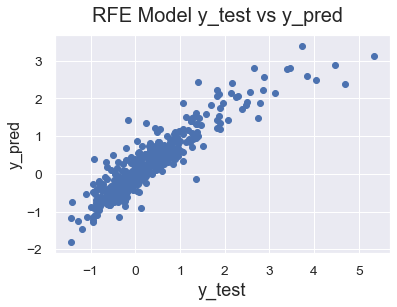

In [162]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_rfe)
fig.suptitle('RFE Model y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     # Plotting y_test and y_pred to understand the spread

- __The error terms have constant variance__

As we can see, through a method we were able to generate models that could present good generalization and better performance when combined manual and automatic (RFE) approaches. <br>
Now we have ran our model (manual approach vs RFE Approach). Let's compare the results <br>

| Features   | Manual model  |         RFE model                                    |
| ------------- |:------------- | :----------------------- :|
| Total Variables   | 21         | 15 |
| R-squared          | .849       | .821                                | 
| Adjusted R-squared | .845       |  .818|
| RMSE(train data)  | 0.36        |    0.39                                       | 
|MAE(train data) |   0.23                      |0.26 |
|MSE(train data)  |   0.13                    | 0.16|

- Both above Models behave almost exactly the same and the results dont vary much
- RFE Model is much faster compared to the Manual Model as lot of time was spent removing features with higher multicollinearity 
- Manual Model does scores __better R-Square and RMSE__ than RFE Model but its not that significant comparing the efforts put in both the models.




<a id=section9></a>
## 9 RFE Model after Removing Outliers using Automatic Outlier Detection.

<a id=section901></a>

### 9.1 Using IsolationForest
- **Isolation Forest** is an **unsupervised** learning algorithm that belongs to the **ensemble decision trees** family.

- It explicitly **isolates anomalies** instead of profiling and constructing normal points and regions by **assigning** a **score** to each data point.

- It takes **advantage** of the fact that **anomalies** are the **minority data points** and that they have **attribute-values** that are very **different** from those of **normal** instances.

- This algorithm works **great** with very **high dimensional datasets** and it proved to be a very **effective** way of **detecting anomalies**.

In [163]:
from sklearn.ensemble import IsolationForest

In [164]:
housing_data_outliers = housing_data.copy()

In [165]:
housing_data_outliers.shape

(1460, 131)

In [166]:
to_model_columns=housing_data_outliers.columns[1:132]

**Applying IsolationForest to our Data**

In [167]:
clf = IsolationForest(n_estimators=100, max_samples='auto', random_state=1, contamination='auto')
preds = clf.fit_predict(housing_data_outliers[to_model_columns])
preds

array([1, 1, 1, ..., 1, 1, 1])

- This code will **output** the **predictions** for **each data point** in an array.

- If the result is **-1**, it means that this specific data point is an **outlier**.

- If the result is **1**, then it means that the data point is **not an outlier**.

- We can then use the **predictions** to **remove** all **outliers** from the data.

In [168]:
# Select all rows that are not outliers
housing_data_outliers['anomaly']=preds
outliers=housing_data_outliers.loc[housing_data_outliers['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(housing_data_outliers['anomaly'].value_counts())

 1    1442
-1      18
Name: anomaly, dtype: int64


**18 Records were found to be Outliers**

In [169]:
housing_data_outliers.shape

(1460, 132)

In [170]:
housing_data_outliers = housing_data_outliers[housing_data_outliers['anomaly']==1]

In [171]:
housing_data_outliers.shape

(1442, 132)

In [172]:
#Drop Anomaly
housing_data_outliers = housing_data_outliers.drop(['anomaly'],axis=1)

In [173]:
housing_data_outliers.shape

(1442, 131)

In [174]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X, y = train_test_split(housing_data_outliers, train_size = 0.7, test_size = 0.3, random_state = 100)

<a id=section902></a>
### 9.2 Rescaling the Features 

We will be using **StandardScalar** because the outliers are already taken care by IsolationForest algorithm

In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
scaler = StandardScaler()

In [177]:
# Apply scaler() to all the columns except the 'yes-no', 'dummy', label_encoded variables

num_vars = [x for x in housing_data.columns if housing_data[x].nunique()!=2]

for x in num_vars:
    if x in label_col:
        num_vars.remove(x)
    else:
        pass

num_vars

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'LandSlope',
 'OverallQual',
 'YearBuilt',
 'MasVnrArea',
 'ExterCond',
 'BsmtCond',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'Functional',
 'Fireplaces',
 'GarageFinish',
 'GarageCars',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'TotBathrooms']

In [178]:
X[num_vars] = scaler.fit_transform(X[num_vars])

In [179]:
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SalePrice,LotFrontage_NAN,MasVnrArea_NAN,HasBasement,HasGarage,HasMasVnr,HasWoodDeck,HasPorch,Has3SsnPorch,HasEnclosedPorch,HasPool,HasFence,HasAlley,HasMiscFeature,IsNew,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,MasVnrType_BrkFace,MasVnrType_MISSING,MasVnrType_None,MasVnrType_Stone,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_MISSING,BsmtExposure_Mn,BsmtExposure_No,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_MISSING,HasRemod,TotBathrooms
164,-0.384701,-1.494555,-0.470643,4,0.213284,-0.034835,1.442522,-0.567932,3,2.514420,3,0.098971,2,-0.137868,0.250531,4,1,0.281342,0.219945,4,0.249715,-0.943244,0,-0.794724,-1.018953,3,0.272462,3,-0.723222,-0.713131,-0.346021,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,-0.262325
1084,0.089971,-0.059349,0.213698,2,0.213284,-0.034835,-0.865814,-0.567932,3,-0.258312,4,0.098971,5,0.388062,-0.882250,4,1,1.065041,-0.013875,3,0.249715,0.609339,3,1.467269,0.340999,3,0.272462,3,1.751694,-0.063105,0.099982,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0.384829
1110,0.089971,-0.059349,-0.237478,4,0.213284,-0.034835,-0.799862,-0.567932,3,-0.258312,4,0.098971,6,-0.495594,-0.679438,4,1,1.244830,0.303168,3,0.249715,0.609339,3,1.467269,0.340999,3,0.272462,3,1.036718,0.527828,0.106264,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1.679139
110,-0.147365,0.237591,-0.100717,4,0.213284,-0.034835,0.486212,-0.567932,3,-0.258312,3,-1.785205,3,0.037442,-0.132834,4,1,0.677801,0.693528,3,0.249715,-0.943244,0,-0.794724,-1.018953,3,0.272462,3,0.706729,-0.713131,-0.535729,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,-0.262325
1306,1.513990,-1.098636,-0.331192,3,0.213284,0.697430,-1.195576,-0.040619,4,-0.258312,4,0.098971,1,-1.014417,0.792188,5,1,-0.795091,-0.271472,4,0.249715,0.609339,4,0.336273,0.340999,3,0.272462,3,0.313886,-0.196065,0.288434,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

<a id=section903></a>
### 9.3 Dividing into X & Y sets for Model Building

In [180]:
y_train = X.pop('SalePrice')
X_train = X

<a id=section904></a>
### 9.4 Building Model with RFE

In [181]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [182]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [183]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 8),
 ('LotFrontage', False, 61),
 ('LotArea', False, 45),
 ('LotShape', False, 106),
 ('LandSlope', False, 108),
 ('OverallQual', True, 1),
 ('YearBuilt', False, 39),
 ('MasVnrArea', False, 22),
 ('ExterQual', False, 19),
 ('ExterCond', False, 96),
 ('BsmtQual', False, 2),
 ('BsmtCond', False, 70),
 ('BsmtFinType1', False, 109),
 ('BsmtFinSF1', False, 11),
 ('TotalBsmtSF', False, 26),
 ('HeatingQC', False, 75),
 ('CentralAir', False, 73),
 ('2ndFlrSF', False, 82),
 ('GrLivArea', True, 1),
 ('KitchenQual', True, 1),
 ('Functional', False, 30),
 ('Fireplaces', False, 52),
 ('FireplaceQu', False, 53),
 ('GarageFinish', False, 98),
 ('GarageCars', False, 47),
 ('GarageQual', False, 18),
 ('GarageCond', False, 95),
 ('PavedDrive', False, 81),
 ('WoodDeckSF', False, 99),
 ('OpenPorchSF', False, 67),
 ('LotFrontage_NAN', False, 103),
 ('MasVnrArea_NAN', False, 34),
 ('HasBasement', True, 1),
 ('HasGarage', False, 17),
 ('HasMasVnr', False, 74),
 ('HasWoodDeck', False, 1

In [184]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'GrLivArea', 'KitchenQual', 'HasBasement', 'HasPool',
       'MSZoning_FV', 'MSZoning_RL', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl',
       'BsmtExposure_Gd', 'SaleCondition_Partial', 'Heating_OthW',
       'SaleType_CWD', 'SaleType_Con', 'SaleType_New'],
      dtype='object')

<a id=section905></a>
### 9.5 Building model using statsmodel, for the detailed statistics

In [185]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [186]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [187]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [188]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     292.0
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:27:52   Log-Likelihood:                -456.46
No. Observations:                1009   AIC:                             954.9
Df Residuals:                     988   BIC:                             1058.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.37

__We picked top 20 attributes using RFE and now we will use again manual approach to eliminate features with multicollinearity in order to have a better model__

In [189]:
X_train_new_rfe = X_train_rfe.drop(['RoofMatl_Roll','Heating_OthW','SaleType_Con','SaleType_New','HasBasement',
                                   'KitchenQual'], axis = 1)

In [190]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_2 = sm.add_constant(X_train_new_rfe)

In [191]:
lm_rfe = sm.OLS(y_train,X_train_2).fit()   # Running the linear model

In [192]:
#Let's see the summary of our linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     377.5
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:27:56   Log-Likelihood:                -501.79
No. Observations:                1009   AIC:                             1034.
Df Residuals:                     994   BIC:                             1107.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.43

In [193]:
X_train_new_rfe = X_train_new_rfe.drop(['const'], axis=1)

In [194]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,2.05
1,GrLivArea,1.76
7,Neighborhood_NridgHt,1.44
4,MSZoning_RL,1.40
12,SaleCondition_Partial,1.35
11,BsmtExposure_Gd,1.24
6,Neighborhood_NoRidge,1.19
9,RoofMatl_Tar&Grv,1.11
3,MSZoning_FV,1.10
2,HasPool,1.09


In [195]:
pd.DataFrame({
     
    'Coeffecient':lm_rfe.params
}).round(decimals=2).sort_values('Coeffecient',ascending=False).style.bar(color=['grey','lightblue'],align='zero')


,Coeffecient
RoofMatl_WdShngl,1.400000
HasPool,0.900000
Neighborhood_NoRidge,0.800000
Neighborhood_NridgHt,0.770000
BsmtExposure_Gd,0.650000
Neighborhood_StoneBr,0.390000
MSZoning_FV,0.380000
OverallQual,0.360000
GrLivArea,0.360000
MSZoning_RL,0.330000


In [196]:
y_train_price_rfe = lm_rfe.predict(X_train_2)

<a id=section906></a>
### 9.6 Residual Analysis of the train data

Text(0.5, 0, 'Errors')

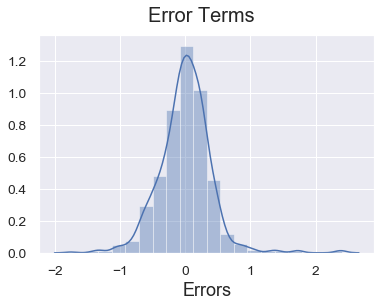

In [197]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price_rfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [198]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_new_rfe.columns]

In [199]:
# Adding constant variable to test dataframe
X_test_rfe = sm.add_constant(X_test_rfe)

In [200]:
X_test_rfe.shape

(438, 15)

<a id=section907></a>
### 9.7 Making Predictions Using the RFE Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the RFE model.

In [201]:
# Making predictions using the RFE model

y_pred_rfe = lm_rfe.predict(X_test_rfe)

<a id=section908></a>
### 9.8 Model Evaluation

In [202]:
# calculate these metrics by hand for Training Data
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_train, y_train_price_rfe))
print('MSE:', metrics.mean_squared_error(y_train, y_train_price_rfe))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_price_rfe)))

MAE: 0.2858369565439537
MSE: 0.15830283335993076
RMSE: 0.3978728859320911


In [203]:
# calculate these metrics by hand for Testing Data
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rfe))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rfe))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe)))

MAE: 0.35142728665038137
MSE: 0.23344608027180055
RMSE: 0.4831625816138917


Text(0, 0.5, 'y_pred')

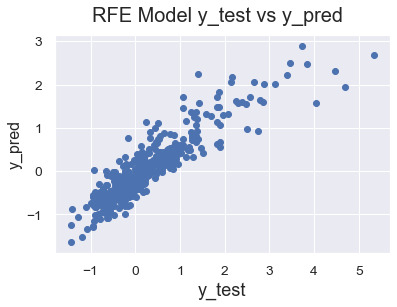

In [204]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_rfe)
fig.suptitle('RFE Model y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     # Plotting y_test and y_pred to understand the spread

We can see that the equation of our best fitted line is:
<div class="alert alert-block alert-warning">
$ SalePrice = 1.4 \times  RoofMatl_WdShngl  + 0.90  \times  HasPool + 0.80  \times  Neighborhood_NoRidge + 0.77 \times Neighborhood_NridgHt + 0.65 \times BsmtExposure_Gd + 0.39 \times Neighborhood_StoneBr + 0.38 \times MSZoning_FV + 0.36 \times OverallQual  + 0.36 \times GrLivArea + 0.33 \times MSZoning_RL + 0.33 \times SaleCondition_Partial + 0.16 \times Neighborhood_Crawfor - 0.53 \times RoofMatl_Tar\&Grv - 0.83 \times SaleType_CWD - 0.440000 $
</div>
<h4>We can read the above as keeping all the variables constant 1 unit increase in RoofMatl_WdShngl can increase the Sale price by 1.4 units </h4>


As we can see, removing Outliers can definitely improve the model R-Square. <br>
Now we have ran our model (manual approach vs RFE Approach vs RFE approach after removing Outliers). Let's compare the results <br>

| Features   | Manual model  | RFE model           | RFE Model(After removing outliers)|
| ------------- |:------------- | :----------------------- |:----------------------------------:|
| Total Variables   | 21         | 15 |            14|
| R-squared          | .849       | .821      |  .842                          | 
| Adjusted R-squared | .845       |  .818| .839|
| RMSE(train data)  | 0.36        |    0.39       |0.39                                | 
|MAE(train data) |   0.23                      |0.26 |0.29|
|MSE(train data)  |   0.13                    | 0.16|0.16|

<a id=section10></a>
## FINAL VERDICT ON THE MODEL

- Above is the comparison of all the three models which have ran on the dataset.
- RFE Model (After Removing Outliers) yields much better result without compromising the cost function. 
- Manual Model does scores __better R-Square and RMSE__ than both RFE Models but its not that significant comparing the efforts put in both the models.

**Overall keeping in mind the below parameters**
   - Time to run the model 
   - Features involved in the model
   - R-square of the model
   - RMSE of the model
   

<div class="alert alert-block alert-success">
<h2>The model with RFE (After Removing Outliers) turns out to be the best model for our dataset</h2>
</div>

__Overall we have a decent model but we also acknowledge that we could still do better.__ 

Below are the few areas where we could improve our Model:
1. More Feature Engineering
  - Add new features (E.g. Constructed Area could be combination of all independent area features etc..)
  - Reduce Cardinalities by clubbing similar items under Nominal Categorical Attributes
2. Build a non-linear model/Try other Regression techniques
3. Variable transformations like Principal component analysis 
4. More sophisticated Feature Selection Techniques required

<a id=section11></a>
##  __CONCLUSION__ 

Now lets look back at the problem statments and answers which needs to be provided to the customer/business.
<br>
- Essentially, the company wants:

  - To identify the variables affecting house prices, e.g., area, number of rooms, bathrooms, etc.
  - To create a linear model that quantitatively relates house prices with variables, such as the number of rooms,     area, number of bathrooms, etc.
  - To know the accuracy of the model, i.e. how well do these variables predict the house prices

The model provides insights based on the House Properties Dataset and here are the recommendations/answers provided based on the choosen model above (RFE Model after removing Outliers):



### To identify the variables affecting house prices :
- We are very confident about some relationship between the probability of raising prices and below are listed based on the ranks of their impact
  - Roof material especially WdShngl
  - Having Pool at the Property
  - Neighborhood especially NoRidge, NridgHt, StoneBr, Crawfor 
  - Having a good walkout or garden level basement walls
  - The general zoning classification especially FV and RL
  - Overall material and finish quality
  - Above grade (ground) living area square feet
  - Condition of Sale especially Partial
            
- Some Relationship cause decline in Saleprices and below are the following:
  - Type of Sale especially CWD
  - Roof material especially Tar and Gravel

    
### To create a linear model that quantitatively relates house prices with variables 
- As the data was scaled we can infer the following:
    
$ SalePrice = 1.4 \times  RoofMatl_WdShngl  + 0.90  \times  HasPool + 0.80  \times  Neighborhood_NoRidge + 0.77 \times Neighborhood_NridgHt + 0.65 \times BsmtExposure_Gd + 0.39 \times Neighborhood_StoneBr + 0.38 \times MSZoning_FV + 0.36 \times OverallQual  + 0.36 \times GrLivArea + 0.33 \times MSZoning_RL + 0.33 \times SaleCondition_Partial + 0.16 \times Neighborhood_Crawfor - 0.53 \times RoofMatl_Tar\&Grv - 0.83 \times SaleType_CWD - 0.440000 $

***We can read the above as keeping all the variables constant 1 unit increase in RoofMatl_WdShngl can increase the Sale price by 1.4 units***
    
### To know the accuracy of the model
- The model has R-Square value of .842 which means it explains __~84%__ of the variance in the data 
- The model has adjusted R- Square value of .839 __(83.9%)__ which is very close to the original R-Square which means the model is not impacted by the number of features and the variance is very stable.
- The errors are __normally distributed__ and follows __homoscedasticity__ and the errors (RMSE) does not vary much between Training and Testing dataset which __confirms the model__ is __not underfitting or overfitting__.
    
  